In [1]:
import uproot as uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import awkward as ak

In [2]:
inputs_root = "/net/scratch_cms3a/hschoenen/deepjet/data/testData/ntuple_merged_342.root:deepntuplizer/tree"

file_ = uproot.open(inputs_root)
columns_ = file_.keys()

In [3]:
columns_

['n_sv',
 'nsv',
 'sv_pt',
 'sv_eta',
 'sv_phi',
 'sv_e',
 'sv_etarel',
 'sv_phirel',
 'sv_deltaR',
 'sv_mass',
 'sv_ntracks',
 'sv_chi2',
 'sv_ndf',
 'sv_normchi2',
 'sv_dxy',
 'sv_dxyerr',
 'sv_dxysig',
 'sv_d3d',
 'sv_d3derr',
 'sv_d3dsig',
 'sv_costhetasvpv',
 'sv_enratio',
 'n_gtracks',
 'nGtracks',
 'gtrack_pt',
 'gtrack_eta',
 'gtrack_phi',
 'gtrack_mass',
 'gtrack_dz',
 'gtrack_dxy',
 'gtrack_3D_ip',
 'gtrack_3D_sip',
 'gtrack_2D_ip',
 'gtrack_2D_sip',
 'gtrack_dR',
 'gtrack_dist_neigh',
 'gtrack_3D_TrackProbability',
 'gtrack_2D_TrackProbability',
 'gtrack_chi2reduced',
 'gtrack_nPixelHits',
 'gtrack_nHits',
 'gtrack_jetAxisDistance',
 'gtrack_jetAxisDlength',
 'gtrack_PCAtrackFromPV',
 'gtrack_dotProdTrack',
 'gtrack_dotProdTrack2D',
 'npv',
 'rho',
 'ntrueInt',
 'event_no',
 'jet_no',
 'gen_pt',
 'Delta_gen_pt',
 'isB',
 'isGBB',
 'isBB',
 'isLeptonicB',
 'isLeptonicB_C',
 'isC',
 'isGCC',
 'isCC',
 'isUD',
 'isS',
 'isG',
 'isPU',
 'isUndefined',
 'genDecay',
 'jet_hflav',


In [24]:
global_branches = ['jet_pt', 'jet_eta','nCpfcand',
                   'nNpfcand','nsv','npv',
                   'TagVarCSV_trackSumJetEtRatio','TagVarCSV_trackSumJetDeltaR','TagVarCSV_vertexCategory',
                   'TagVarCSV_trackSip2dValAboveCharm','TagVarCSV_trackSip2dSigAboveCharm','TagVarCSV_trackSip3dValAboveCharm',
                   'TagVarCSV_trackSip3dSigAboveCharm','TagVarCSV_jetNSelectedTracks','TagVarCSV_jetNTracksEtaRel']
                
cpf_branches = ['Cpfcan_BtagPf_trackEtaRel','Cpfcan_BtagPf_trackPtRel','Cpfcan_BtagPf_trackPPar',
                'Cpfcan_BtagPf_trackDeltaR','Cpfcan_BtagPf_trackPParRatio','Cpfcan_BtagPf_trackSip2dVal',
                'Cpfcan_BtagPf_trackSip2dSig','Cpfcan_BtagPf_trackSip3dVal','Cpfcan_BtagPf_trackSip3dSig',
                'Cpfcan_BtagPf_trackJetDistVal','Cpfcan_ptrel','Cpfcan_drminsv',
                'Cpfcan_VTX_ass','Cpfcan_puppiw','Cpfcan_chi2',
                'Cpfcan_quality']

npf_branches = ['Npfcan_ptrel','Npfcan_deltaR','Npfcan_isGamma',
                'Npfcan_HadFrac', 'Npfcan_drminsv', 'Npfcan_puppiw']
        
vtx_branches = ['sv_pt','sv_deltaR','sv_mass',
                'sv_ntracks','sv_chi2','sv_normchi2',
                'sv_dxy','sv_dxysig','sv_d3d',
                'sv_d3dsig','sv_costhetasvpv','sv_enratio']

y_branches = ['isB','isGBB','isBB','isLeptonicB','isLeptonicB_C','isC','isGCC','isCC','isUD','isS','isG','isPU','isUndefined']

In [25]:
df_glob = file_.arrays(global_branches, library="ak")
df_cpf = file_.arrays(cpf_branches, library="ak")
df_npf = file_.arrays(npf_branches, library="ak")
df_vtx = file_.arrays(vtx_branches, library="ak")

df_y = file_.arrays(y_branches, library="ak")

In [6]:
# get the true jet flavours
isB = ak.to_numpy(df_y['isB'][:])
isGBB = ak.to_numpy(df_y['isGBB'][:])
isBB = ak.to_numpy(df_y['isBB'][:])
isLeptonicB = ak.to_numpy(df_y['isLeptonicB'][:])
isLeptonicB_C = ak.to_numpy(df_y['isLeptonicB_C'][:])
isC = ak.to_numpy(df_y['isC'][:])
isGCC = ak.to_numpy(df_y['isGCC'][:])
isCC = ak.to_numpy(df_y['isCC'][:])
isUD = ak.to_numpy(df_y['isUD'][:])
isS = ak.to_numpy(df_y['isS'][:])
isG = ak.to_numpy(df_y['isG'][:])
isPU = ak.to_numpy(df_y['isPU'][:])
isUndefined = ak.to_numpy(df_y['isUndefined'][:])

B = isB + + isGBB + isBB + isLeptonicB + isLeptonicB_C
C = isC + isGCC + isCC
UDSG = isUD + isS + isG
isDefined = (B+C+UDSG) == 1

In [7]:
df_cpf_clip = ak.pad_none(df_cpf,25,clip=True)
df_npf_clip = ak.pad_none(df_npf,25,clip=True)
df_vtx_clip = ak.pad_none(df_vtx,4,clip=True)

In [8]:
# new version: ignore isPU jets and default values
def quantile_min_max(feature,group='glob',candidate=None):
    if group=='glob':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_glob[feature])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        non_default = abs(array_np)>10**(-20)
        mini, maxi = np.quantile(array_np[isDefined & non_default],0.01),np.quantile(array_np[isDefined & non_default],0.99)
        mini_, maxi_ = np.quantile(array_np[isDefined & non_default],0.2),np.quantile(array_np[isDefined & non_default],0.8)
        return [mini, maxi], np.std(array_np[isDefined & non_default & (array_np >= mini_) & (array_np <= maxi_)])
    elif group=='cpf':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_cpf_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np[isDefined & non_default],0.01),np.quantile(array_np[isDefined & non_default],0.99)
        mini_, maxi_ = np.quantile(array_np[isDefined & non_default],0.2),np.quantile(array_np[isDefined & non_default],0.8)
        return [mini, maxi], np.std(array_np[isDefined & non_default & (array_np >= mini_) & (array_np <= maxi_)])
    elif group=='npf':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_npf_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np[isDefined & non_default],0.01),np.quantile(array_np[isDefined & non_default],0.99)
        mini_, maxi_ = np.quantile(array_np[isDefined & non_default],0.2),np.quantile(array_np[isDefined & non_default],0.8)
        return [mini, maxi], np.std(array_np[isDefined & non_default & (array_np >= mini_) & (array_np <= maxi_)])
    elif group=='vtx':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_vtx_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np[isDefined & non_default],0.01),np.quantile(array_np[isDefined & non_default],0.99)
        mini_, maxi_ = np.quantile(array_np[isDefined & non_default],0.2),np.quantile(array_np[isDefined & non_default],0.8)
        return [mini, maxi], np.std(array_np[isDefined & non_default & (array_np >= mini_) & (array_np <= maxi_)])
    elif group=='cpf_pts':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_cpf_pts_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np[isDefined & non_default],0.01),np.quantile(array_np[isDefined & non_default],0.99)
        mini_, maxi_ = np.quantile(array_np[isDefined & non_default],0.2),np.quantile(array_np[isDefined & non_default],0.8)
        return [mini, maxi], np.std(array_np[isDefined & non_default & (array_np >= mini_) & (array_np <= maxi_)])
    elif group=='npf_pts':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_npf_pts_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np[isDefined & non_default],0.01),np.quantile(array_np[isDefined & non_default],0.99)
        mini_, maxi_ = np.quantile(array_np[isDefined & non_default],0.2),np.quantile(array_np[isDefined & non_default],0.8)
        return [mini, maxi], np.std(array_np[isDefined & non_default & (array_np >= mini_) & (array_np <= maxi_)])
    elif group=='vtx_pts':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_vtx_pts_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np[isDefined & non_default],0.01),np.quantile(array_np[isDefined & non_default],0.99)
        mini_, maxi_ = np.quantile(array_np[isDefined & non_default],0.2),np.quantile(array_np[isDefined & non_default],0.8)
        return [mini, maxi], np.std(array_np[isDefined & non_default & (array_np >= mini_) & (array_np <= maxi_)])

In [9]:
'''
def quantile_min_max(feature,group='glob',candidate=None):
    if group=='glob':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_glob[feature])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='cpf':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_cpf_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='npf':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_npf_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='vtx':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_vtx_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='cpf_pts':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_cpf_pts_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='npf_pts':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_npf_pts_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='vtx_pts':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_vtx_pts_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
'''

In [10]:
print(quantile_min_max('jet_pt','glob'))

jet_pt glob None
([15.444969825744629, 1535.6858300781278], 69.261475)


In [11]:
global_epsilons = np.zeros(len(global_branches))

global_standardized_epsilons = np.zeros(len(global_branches))

global_ranges = np.zeros((len(global_branches),2))

for (i,key) in enumerate(global_branches):
    range_inputs, standardized_epsilon = quantile_min_max(key,'glob')
    scale_epsilon = (range_inputs[1] - range_inputs[0])/2
    global_epsilons[i] = scale_epsilon
    global_standardized_epsilons[i] = standardized_epsilon
    global_ranges[i] = range_inputs
    print(range_inputs, scale_epsilon, standardized_epsilon)

jet_pt glob None
[15.444969825744629, 1535.6858300781278] 760.1204301261915 69.261475
jet_eta glob None
[-2.3910172843933104, 2.3943071389198303] 2.39266221165657 0.62393546
nCpfcand glob None
[1.0, 36.0] 17.5 2.8966672
nNpfcand glob None
[0.0, 20.0] 10.0 2.1228364
nsv glob None
[0.0, 4.0] 2.0 0.48071712
npv glob None
[9.0, 48.0] 19.5 4.1257358
TagVarCSV_trackSumJetEtRatio glob None
[0.0, 0.9856463485956194] 0.4928231742978097 0.10858201
TagVarCSV_trackSumJetDeltaR glob None
[0.0, 2.6554229521751425] 1.3277114760875712 0.015905594
TagVarCSV_vertexCategory glob None
[0.0, 2.0] 1.0 0.92754763
TagVarCSV_trackSip2dValAboveCharm glob None
[-0.014902344904839993, 0.036601562052965164] 0.02575195347890258 0.00093595526
TagVarCSV_trackSip2dSigAboveCharm glob None
[-2.80285924911499, 12.758635606765749] 7.780747427940369 0.35713342
TagVarCSV_trackSip3dValAboveCharm glob None
[-0.029931544382125138, 0.06389331802725805] 0.046912431204691594 0.0019247151
TagVarCSV_trackSip3dSigAboveCharm glob Non

In [12]:
cpf_epsilons = np.zeros((len(cpf_branches),25))
cpf_standardized_epsilons = np.zeros((len(cpf_branches),25))
cpf_ranges = np.zeros((len(cpf_branches),25, 2))
for (i,key) in enumerate(cpf_branches):
    for cand in range(25):
        range_inputs, standardized_epsilon = quantile_min_max(key,'cpf',cand)
        scale_epsilon = (range_inputs[1] - range_inputs[0])/2
        cpf_epsilons[i,cand] = scale_epsilon
        cpf_standardized_epsilons[i,cand] = standardized_epsilon
        cpf_ranges[i,cand] = range_inputs
        print(range_inputs, scale_epsilon, standardized_epsilon)

Cpfcan_BtagPf_trackEtaRel cpf 0
[1.617732959985733, 6.018733162879944] 2.2005001014471057 0.44647524
Cpfcan_BtagPf_trackEtaRel cpf 1
[0.0, 6.157034592628479] 3.0785172963142395 0.4810523
Cpfcan_BtagPf_trackEtaRel cpf 2
[0.0, 6.215461888313295] 3.1077309441566476 0.51979274
Cpfcan_BtagPf_trackEtaRel cpf 3
[0.0, 6.238176612854007] 3.1190883064270034 0.57858634
Cpfcan_BtagPf_trackEtaRel cpf 4
[0.0, 6.228526821136475] 3.1142634105682374 0.9895551
Cpfcan_BtagPf_trackEtaRel cpf 5
[0.0, 6.37112273693085] 3.185561368465425 0.5542116
Cpfcan_BtagPf_trackEtaRel cpf 6
[0.0, 6.171495952606201] 3.0857479763031006 1.4590685
Cpfcan_BtagPf_trackEtaRel cpf 7
[0.0, 6.1091217470169115] 3.0545608735084557 1.3565041
Cpfcan_BtagPf_trackEtaRel cpf 8
[0.0, 6.034450130462647] 3.0172250652313237 1.2384918
Cpfcan_BtagPf_trackEtaRel cpf 9
[0.0, 5.98552928924561] 2.992764644622805 1.1226931
Cpfcan_BtagPf_trackEtaRel cpf 10
[0.0, 5.950114784240723] 2.9750573921203616 1.0218836
Cpfcan_BtagPf_trackEtaRel cpf 11
[0.0, 

In [13]:
npf_epsilons = np.zeros((len(npf_branches),25))
npf_standardized_epsilons = np.zeros((len(npf_branches),25))
npf_ranges = np.zeros((len(npf_branches),25, 2))
for (i,key) in enumerate(npf_branches):
    for cand in range(25):
        range_inputs, standardized_epsilon = quantile_min_max(key,'npf',cand)
        scale_epsilon = (range_inputs[1] - range_inputs[0])/2
        npf_epsilons[i,cand] = scale_epsilon
        npf_standardized_epsilons[i,cand] = standardized_epsilon
        npf_ranges[i,cand] = range_inputs
        print(range_inputs, scale_epsilon, standardized_epsilon)

Npfcan_ptrel npf 0
[-0.996482680439949, 6.301948460639793e-40] 0.4982413402199745 0.068871714
Npfcan_ptrel npf 1
[-0.9978387385606766, 1.4778955123065394e-39] 0.4989193692803383 0.038604733
Npfcan_ptrel npf 2
[-0.9984986788034439, 1.908204927510848e-39] 0.49924933940172195 0.36749423
Npfcan_ptrel npf 3
[-0.9986718302965164, 2.3901500891778286e-39] 0.4993359151482582 0.44315353
Npfcan_ptrel npf 4
[-0.9987648129463196, 2.9946303236943065e-39] 0.4993824064731598 0.48076108
Npfcan_ptrel npf 5
[-0.9988119608163833, 3.0554136064022447e-39] 0.4994059804081917 0.46534926
Npfcan_ptrel npf 6
[-0.9988495117425918, 3.074942101801075e-39] 0.4994247558712959 0.43449128
Npfcan_ptrel npf 7
[-0.998893501162529, 3.074942101801075e-39] 0.4994467505812645 0.4358123
Npfcan_ptrel npf 8
[-0.9989380246400833, 3.074942101801075e-39] 0.49946901232004165 0.43677112
Npfcan_ptrel npf 9
[-0.998963058590889, 3.074942101801075e-39] 0.4994815292954445 0.43730402
Npfcan_ptrel npf 10
[-0.99898004591465, 3.07494210180107

In [14]:
vtx_epsilons = np.zeros((len(vtx_branches),4))
vtx_standardized_epsilons = np.zeros((len(vtx_branches),4))
vtx_ranges = np.zeros((len(vtx_branches),4, 2))
for (i,key) in enumerate(vtx_branches):
    for cand in range(4):
        range_inputs, standardized_epsilon = quantile_min_max(key,'vtx',cand)
        scale_epsilon = (range_inputs[1] - range_inputs[0])/2
        vtx_epsilons[i,cand] = scale_epsilon
        vtx_standardized_epsilons[i,cand] = standardized_epsilon
        vtx_ranges[i,cand] = range_inputs
        print(range_inputs, scale_epsilon, standardized_epsilon)

sv_pt vtx 0
[0.0, 269.856730957032] 134.928365478516 5.4534755
sv_pt vtx 1
[0.0, 281.2003521728516] 140.6001760864258 5.6200886
sv_pt vtx 2
[0.0, 286.32098419189475] 143.16049209594738 5.698825
sv_pt vtx 3
[0.0, 287.81987030029313] 143.90993515014657 5.7361717
sv_deltaR vtx 0
[-0.4964105808734894, 0.9960784316062927] 0.746244506239891 0.18949272
sv_deltaR vtx 1
[-0.49653978377580643, 0.9960784316062927] 0.7463091076910495 0.18948236
sv_deltaR vtx 2
[-0.49655191361904144, 0.9960784316062927] 0.7463151726126671 0.18931986
sv_deltaR vtx 3
[-0.49655530124902725, 0.9960784316062927] 0.74631686642766 0.18927982
sv_mass vtx 0
[0.0, 9.330854740142827] 4.665427370071414 0.37612337
sv_mass vtx 1
[0.0, 10.927909107208267] 5.463954553604133 0.4033041
sv_mass vtx 2
[0.0, 11.51501242637637] 5.757506213188185 0.41284034
sv_mass vtx 3
[0.0, 11.724386806488063] 5.8621934032440315 0.41660202
sv_ntracks vtx 0
[0.0, 8.0] 4.0 1.1459498
sv_ntracks vtx 1
[0.0, 8.0] 4.0 1.1509805
sv_ntracks vtx 2
[0.0, 9.0] 4

In [15]:
np.save('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/global_epsilons.npy',global_epsilons)
np.save('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/global_standardized_epsilons.npy',global_standardized_epsilons)
np.save('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/global_ranges.npy',global_ranges)
np.save('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/cpf_epsilons.npy',cpf_epsilons)
np.save('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/cpf_standardized_epsilons.npy',cpf_standardized_epsilons)
np.save('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/cpf_ranges.npy',cpf_ranges)
np.save('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/npf_epsilons.npy',npf_epsilons)
np.save('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/npf_standardized_epsilons.npy',npf_standardized_epsilons)
np.save('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/npf_ranges.npy',npf_ranges)
np.save('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/vtx_epsilons.npy',vtx_epsilons)
np.save('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/vtx_standardized_epsilons.npy',vtx_standardized_epsilons)
np.save('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/vtx_ranges.npy',vtx_ranges)

jet_pt
mini = 15.445 , maxi = 1535.686 , mini_ = 27.808 , maxi_ = 355.308
epsilon = 760.120 , standardized epsilons = 74.731
jet_eta
mini = -2.391 , maxi = 2.394 , mini_ = -1.106 , maxi_ = 1.103
epsilon = 2.393 , standardized epsilons = 0.615
Cpfcan_BtagPf_trackDeltaR
mini = 0.003 , maxi = 0.390 , mini_ = 0.064 , maxi_ = 0.279
epsilon = 0.193 , standardized epsilons = 0.061
Cpfcan_BtagPf_trackPParRatio
mini = 0.929 , maxi = 1.000 , mini_ = 0.982 , maxi_ = 0.999
epsilon = 0.035 , standardized epsilons = 0.005
Cpfcan_BtagPf_trackSip2dVal
mini = -0.003 , maxi = 13.151 , mini_ = 0.005 , maxi_ = 2.993
epsilon = 6.577 , standardized epsilons = 0.811
Cpfcan_BtagPf_trackSip2dSig
mini = -0.414 , maxi = 228.032 , mini_ = 1.343 , maxi_ = 50.559
epsilon = 114.223 , standardized epsilons = 14.828
Cpfcan_BtagPf_trackSip3dVal
mini = -0.400 , maxi = 19.327 , mini_ = 0.005 , maxi_ = 4.225
epsilon = 9.864 , standardized epsilons = 1.179
Cpfcan_BtagPf_trackSip3dSig
mini = -0.739 , maxi = 484.155 , mini_ 

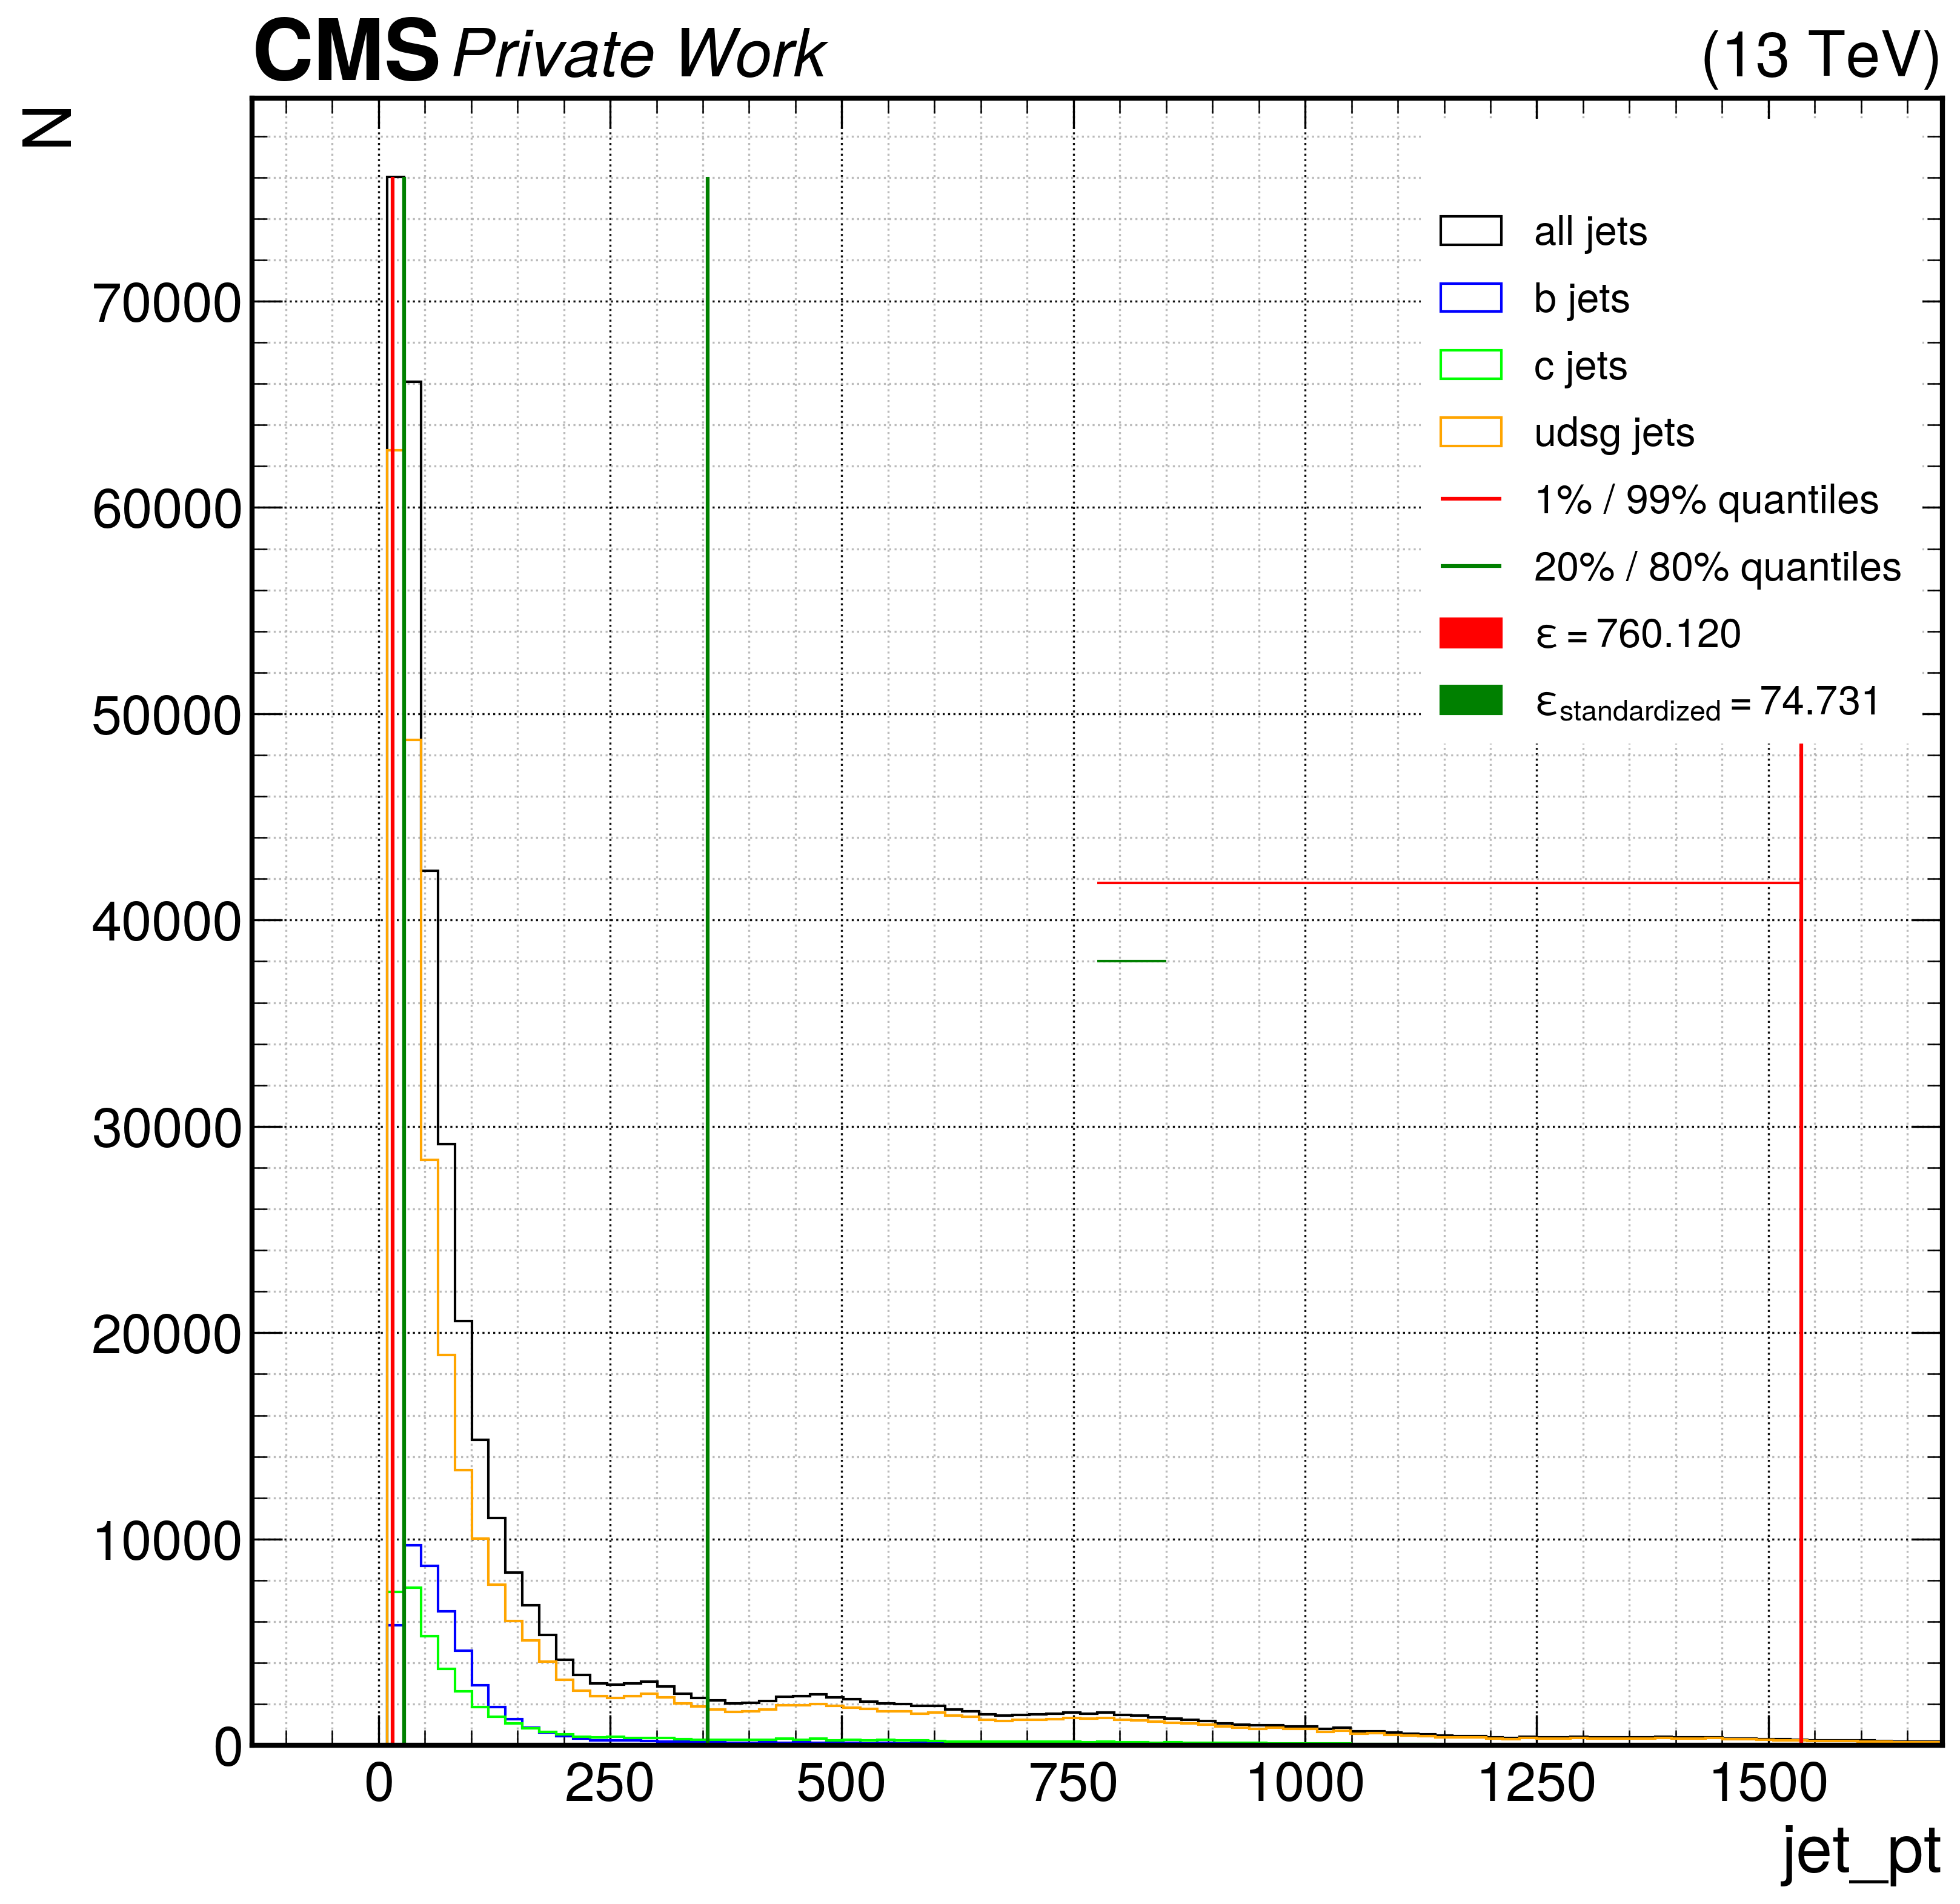

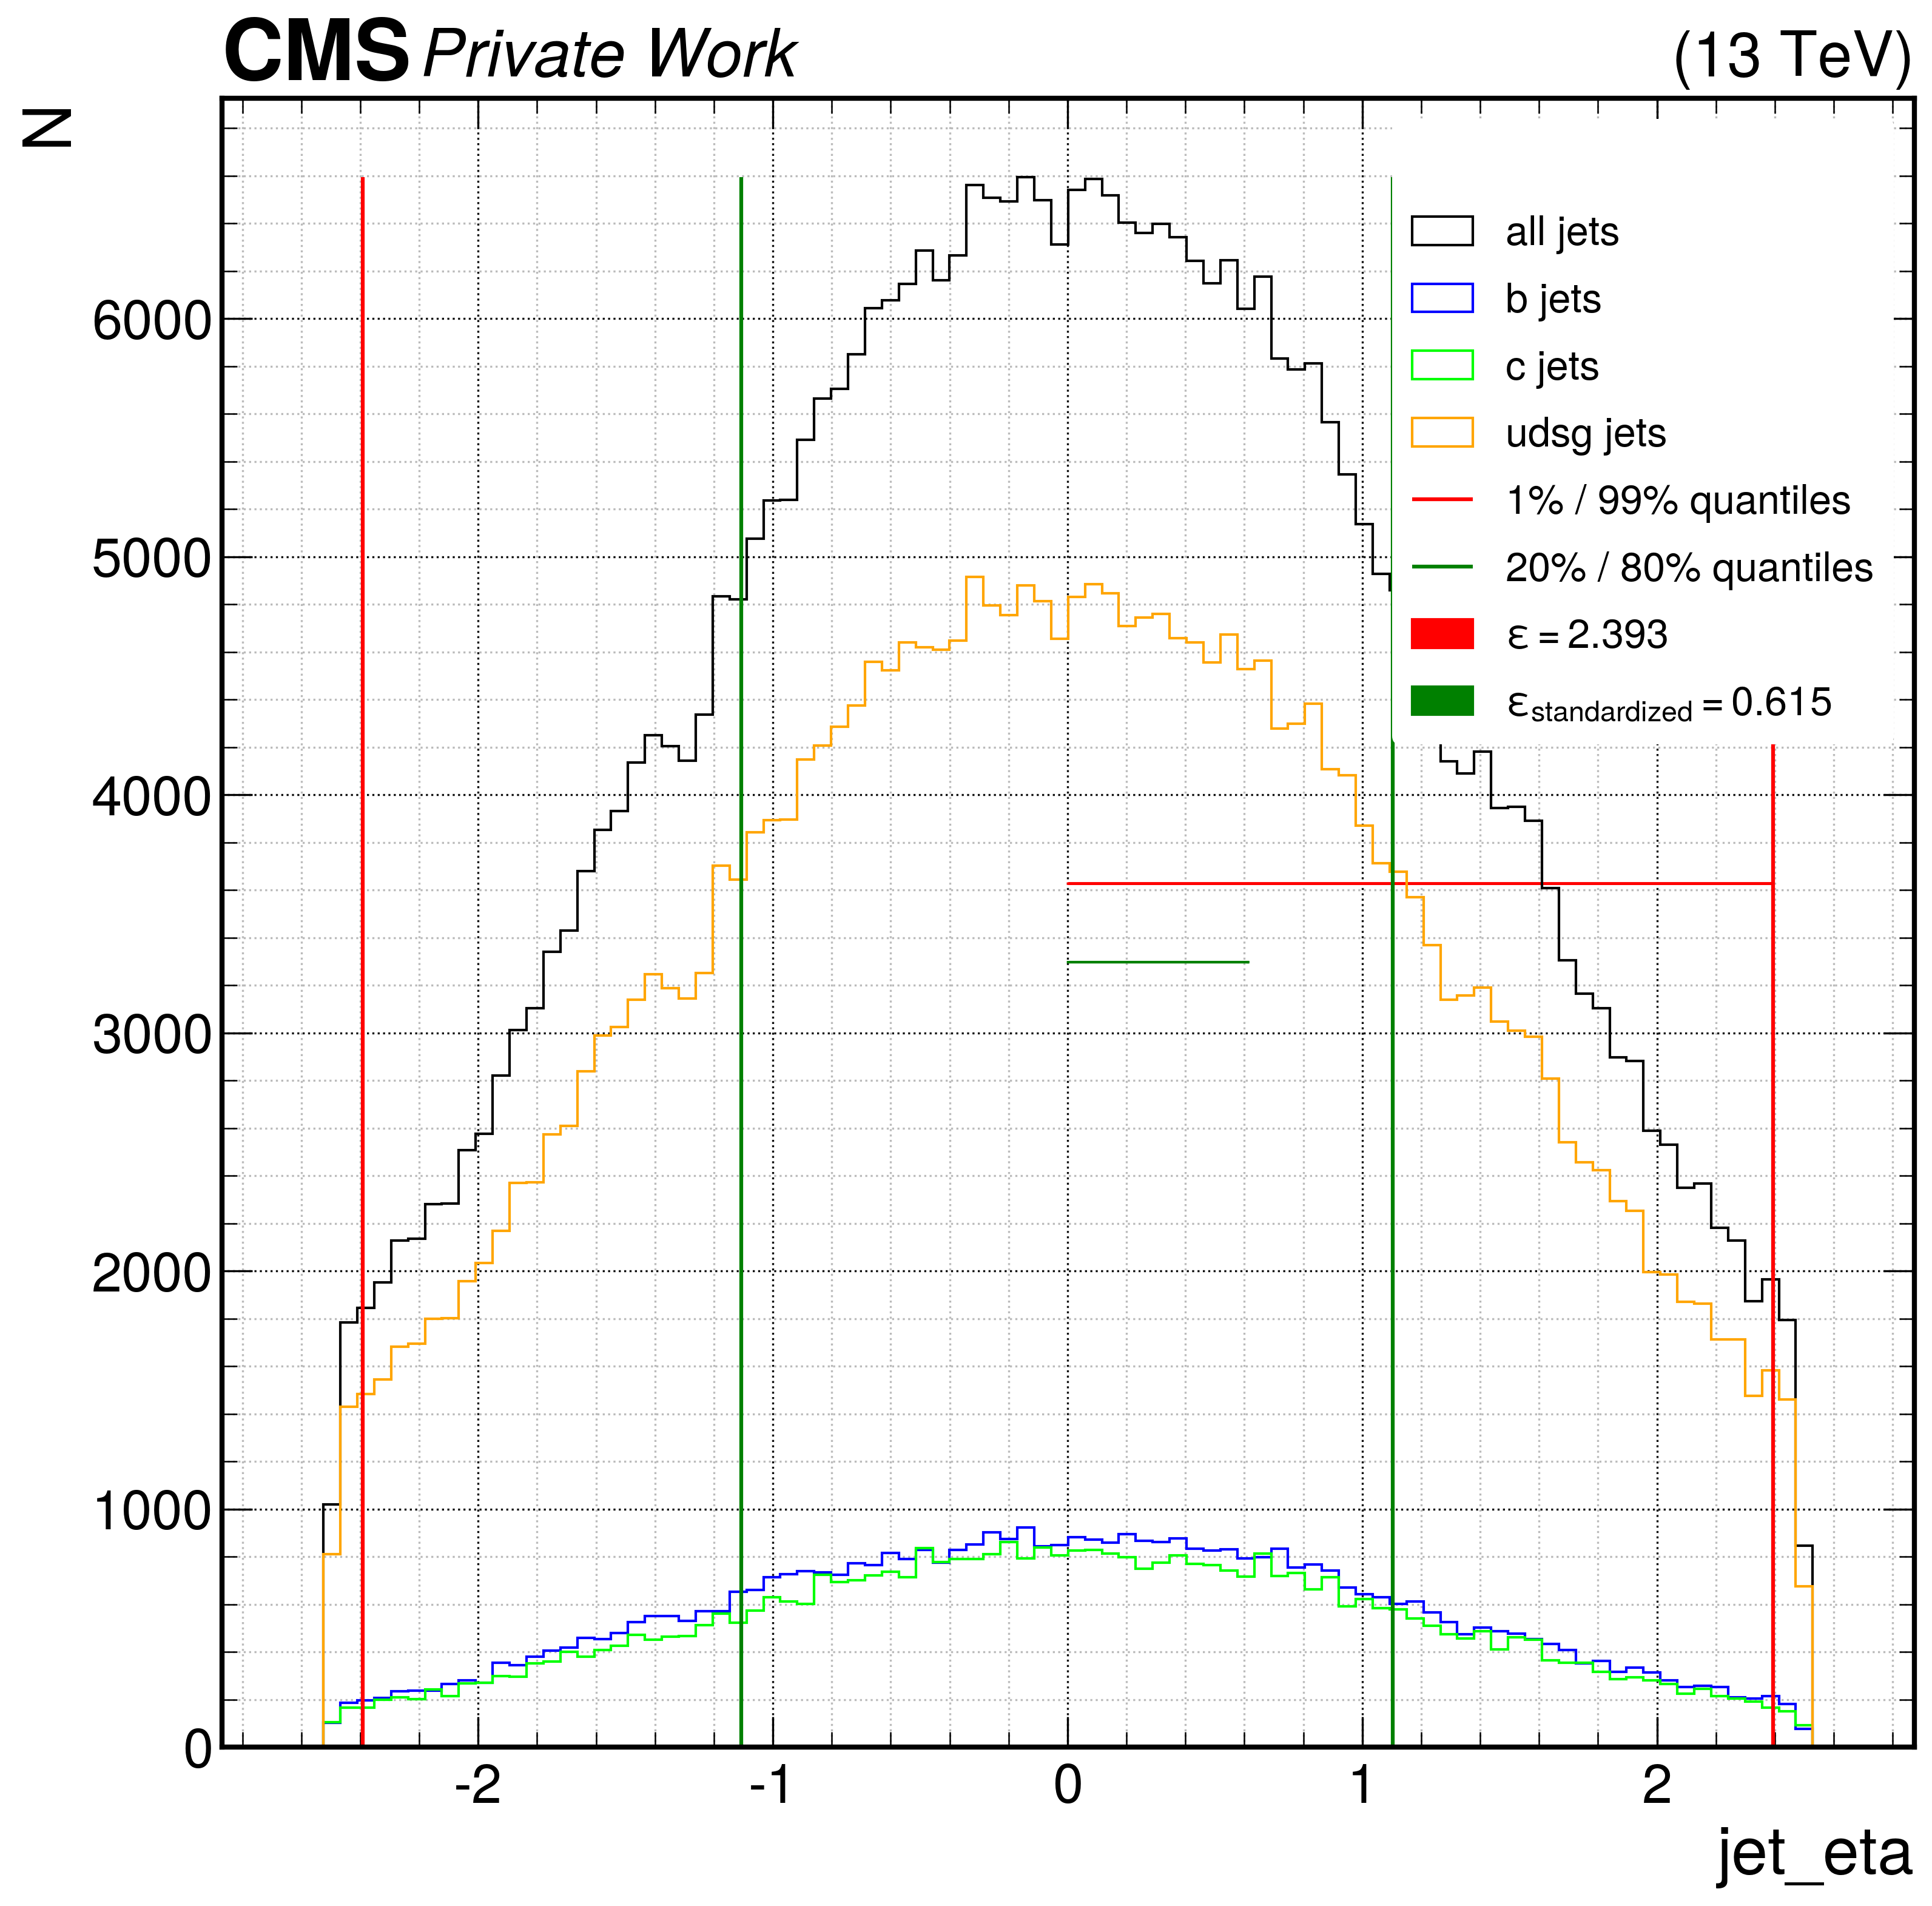

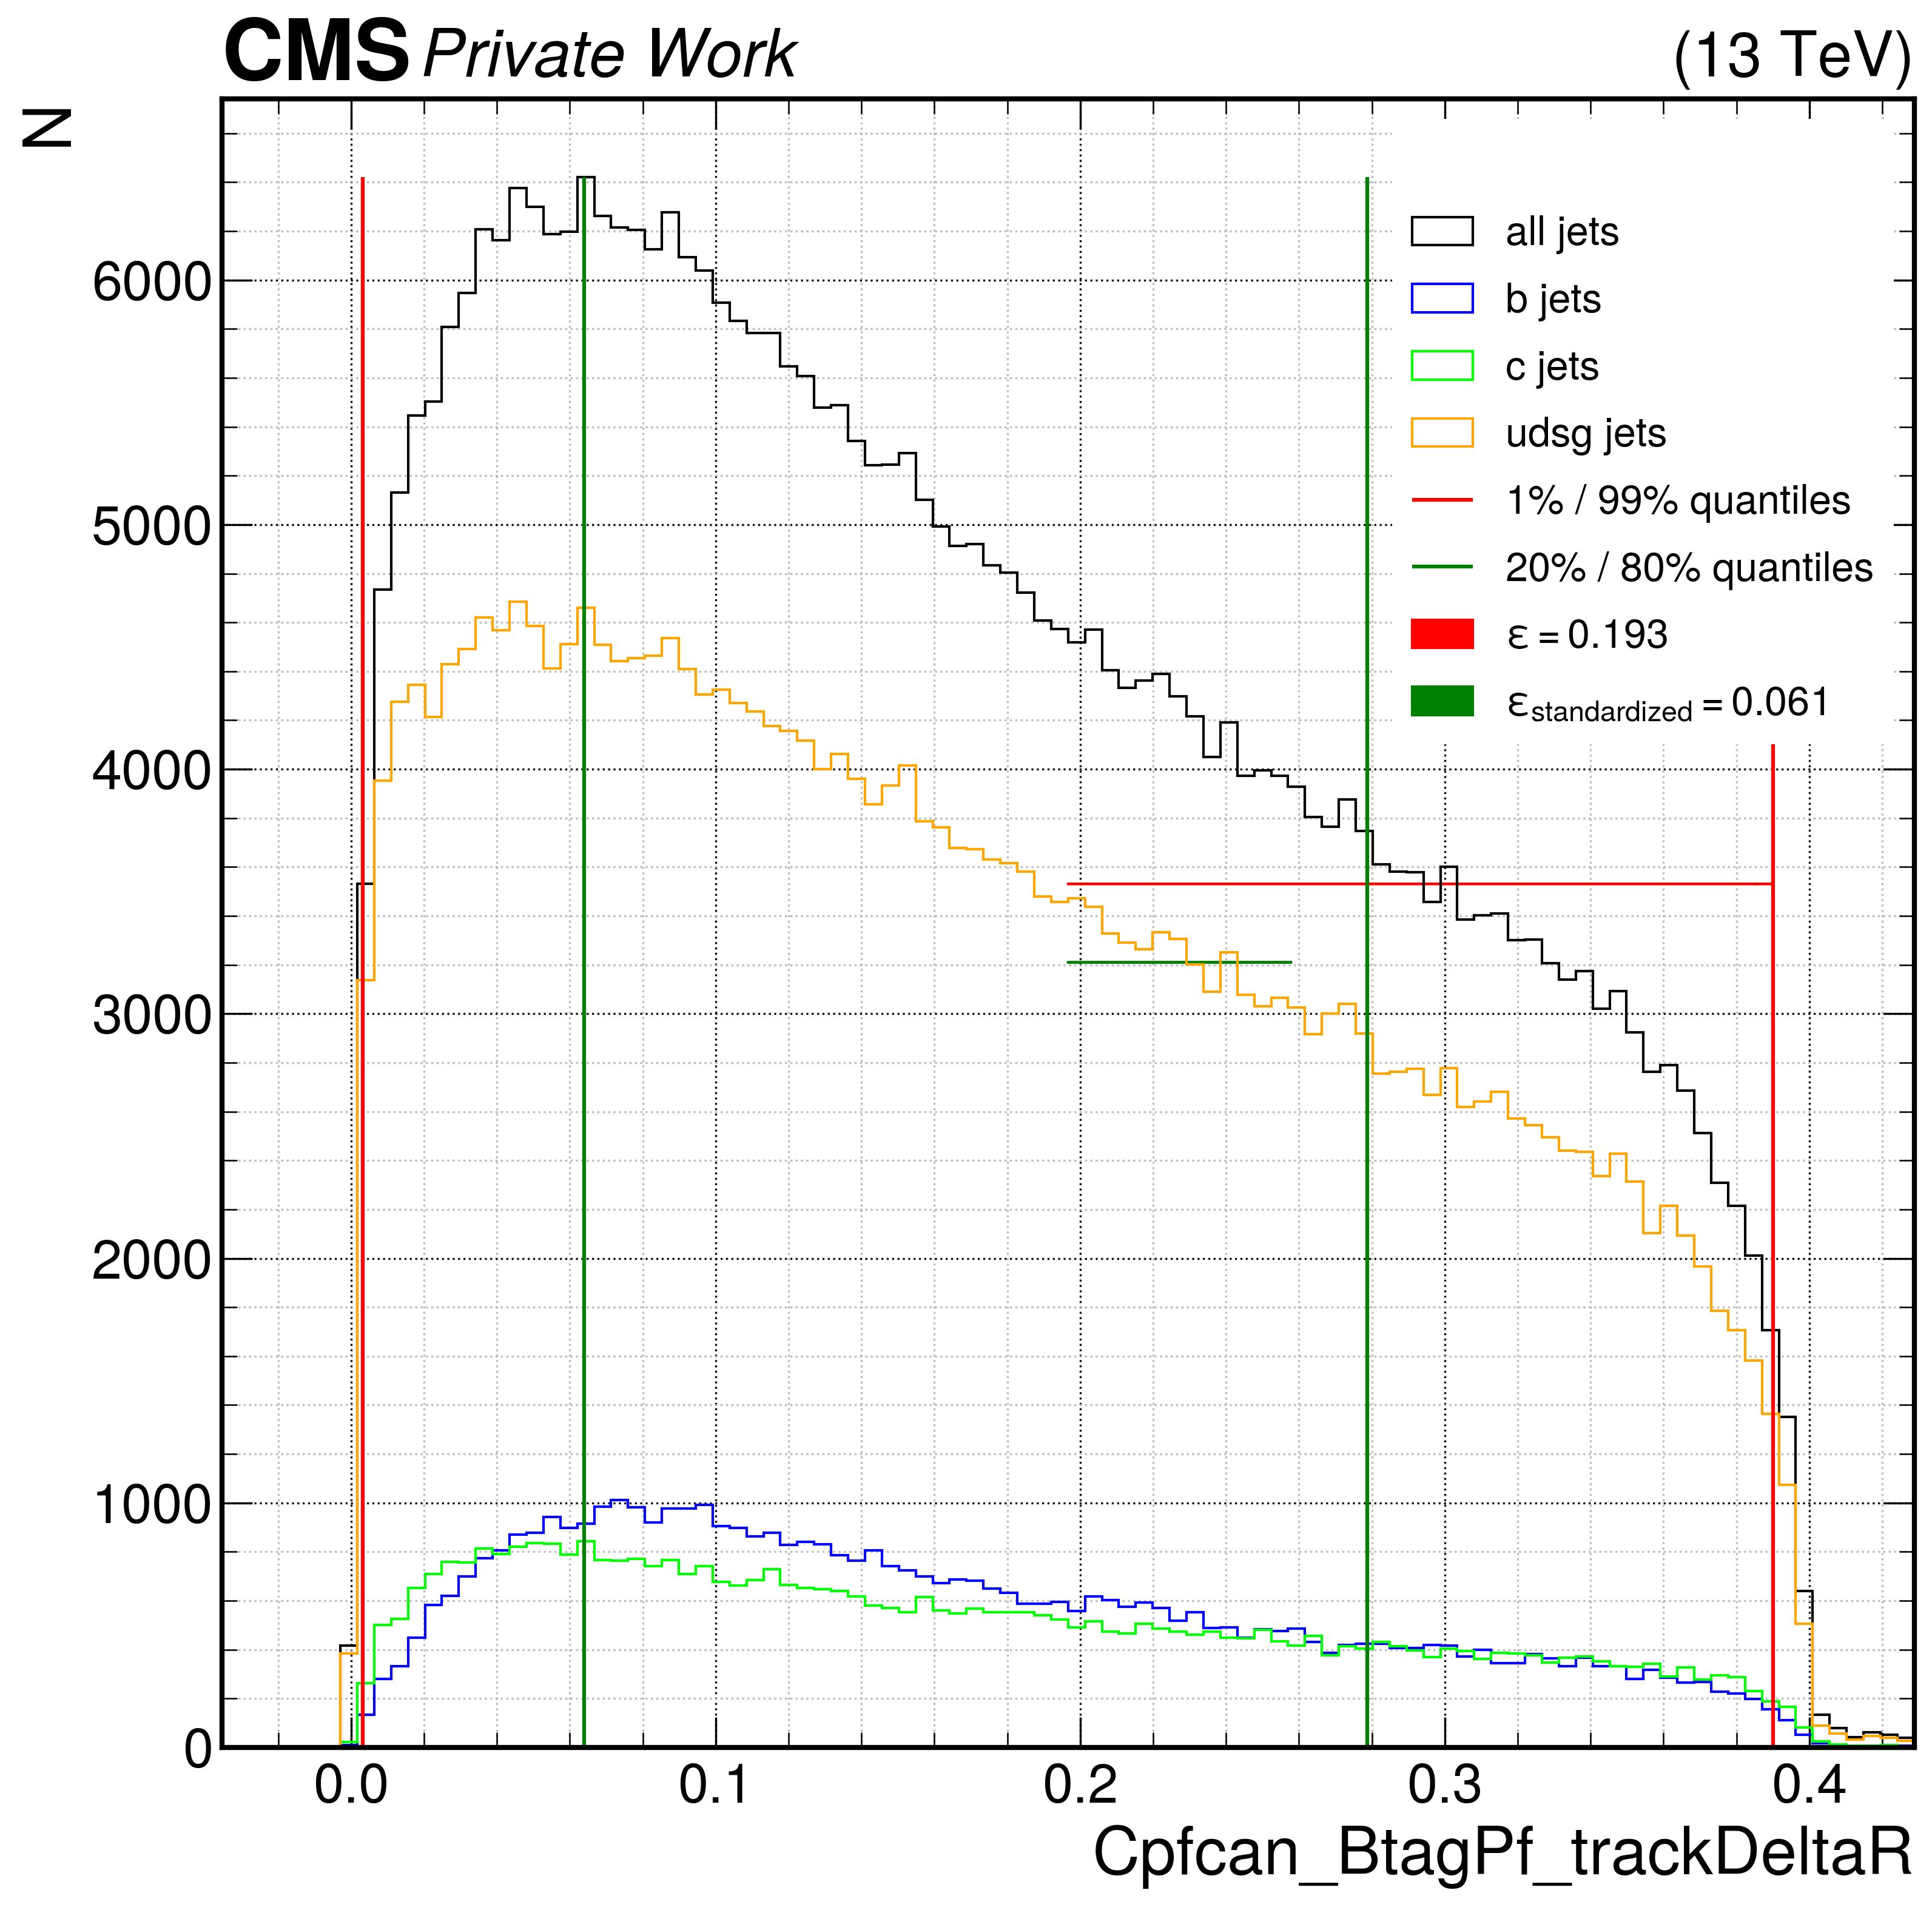

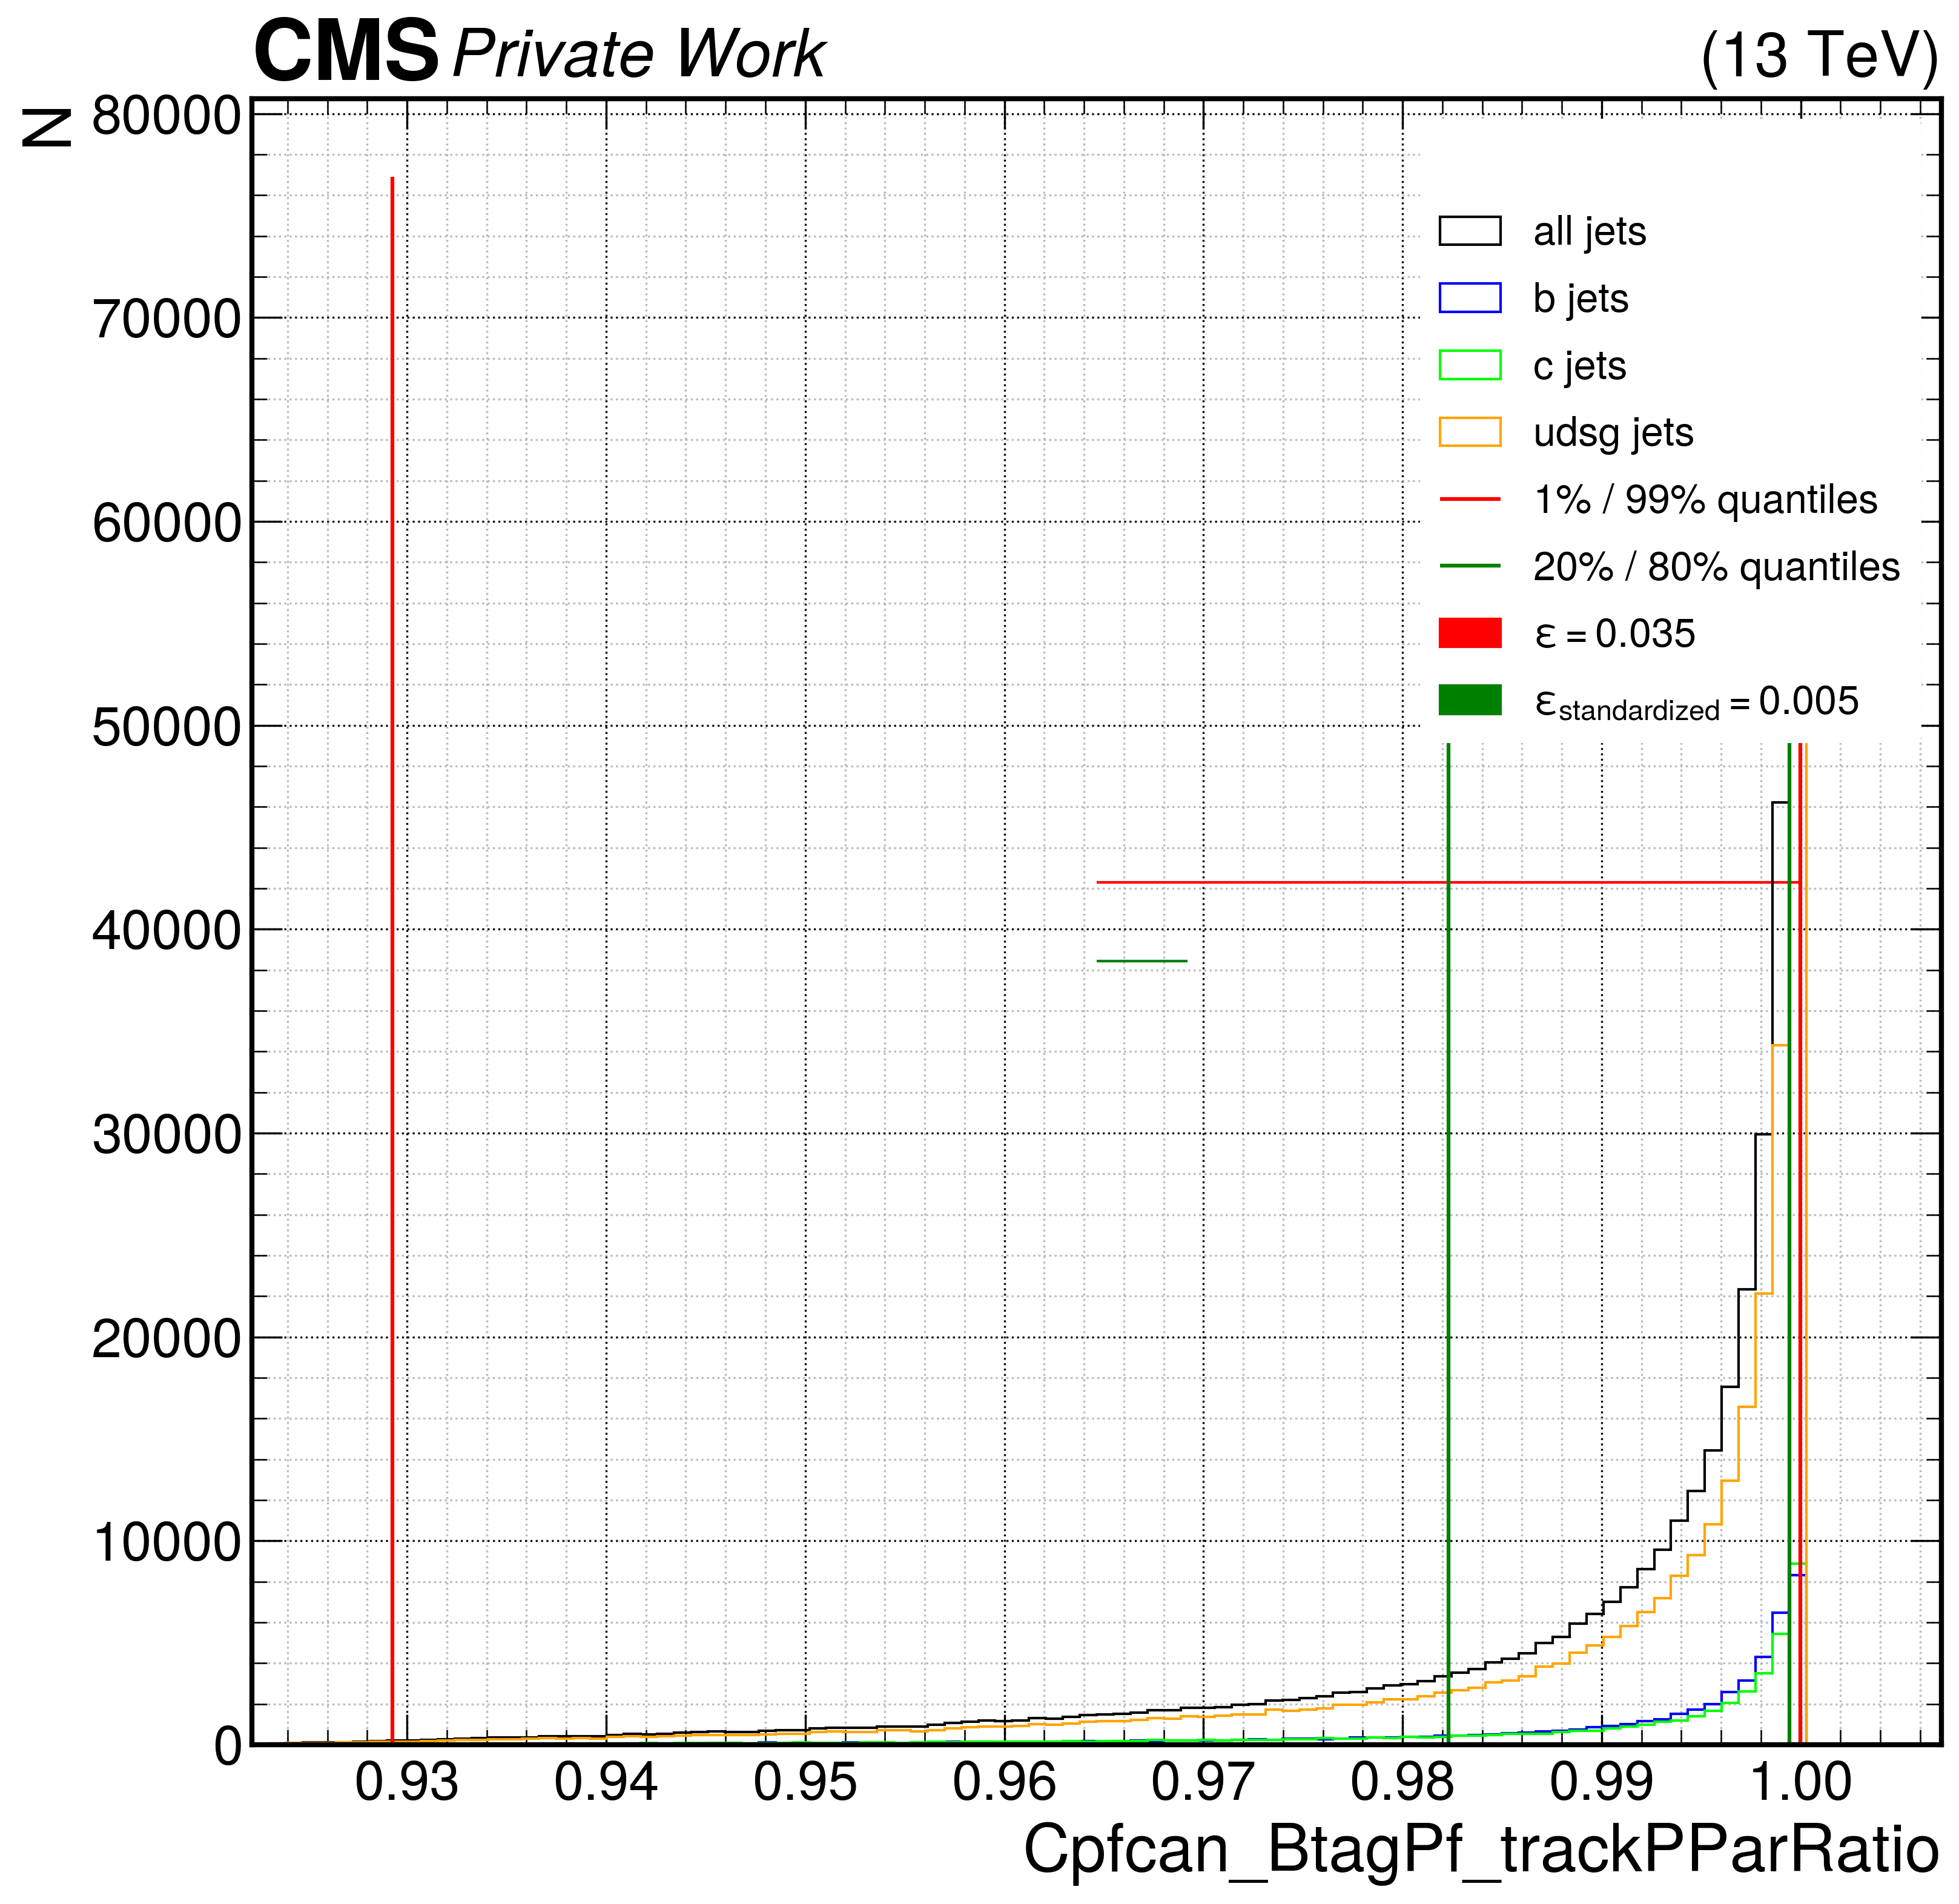

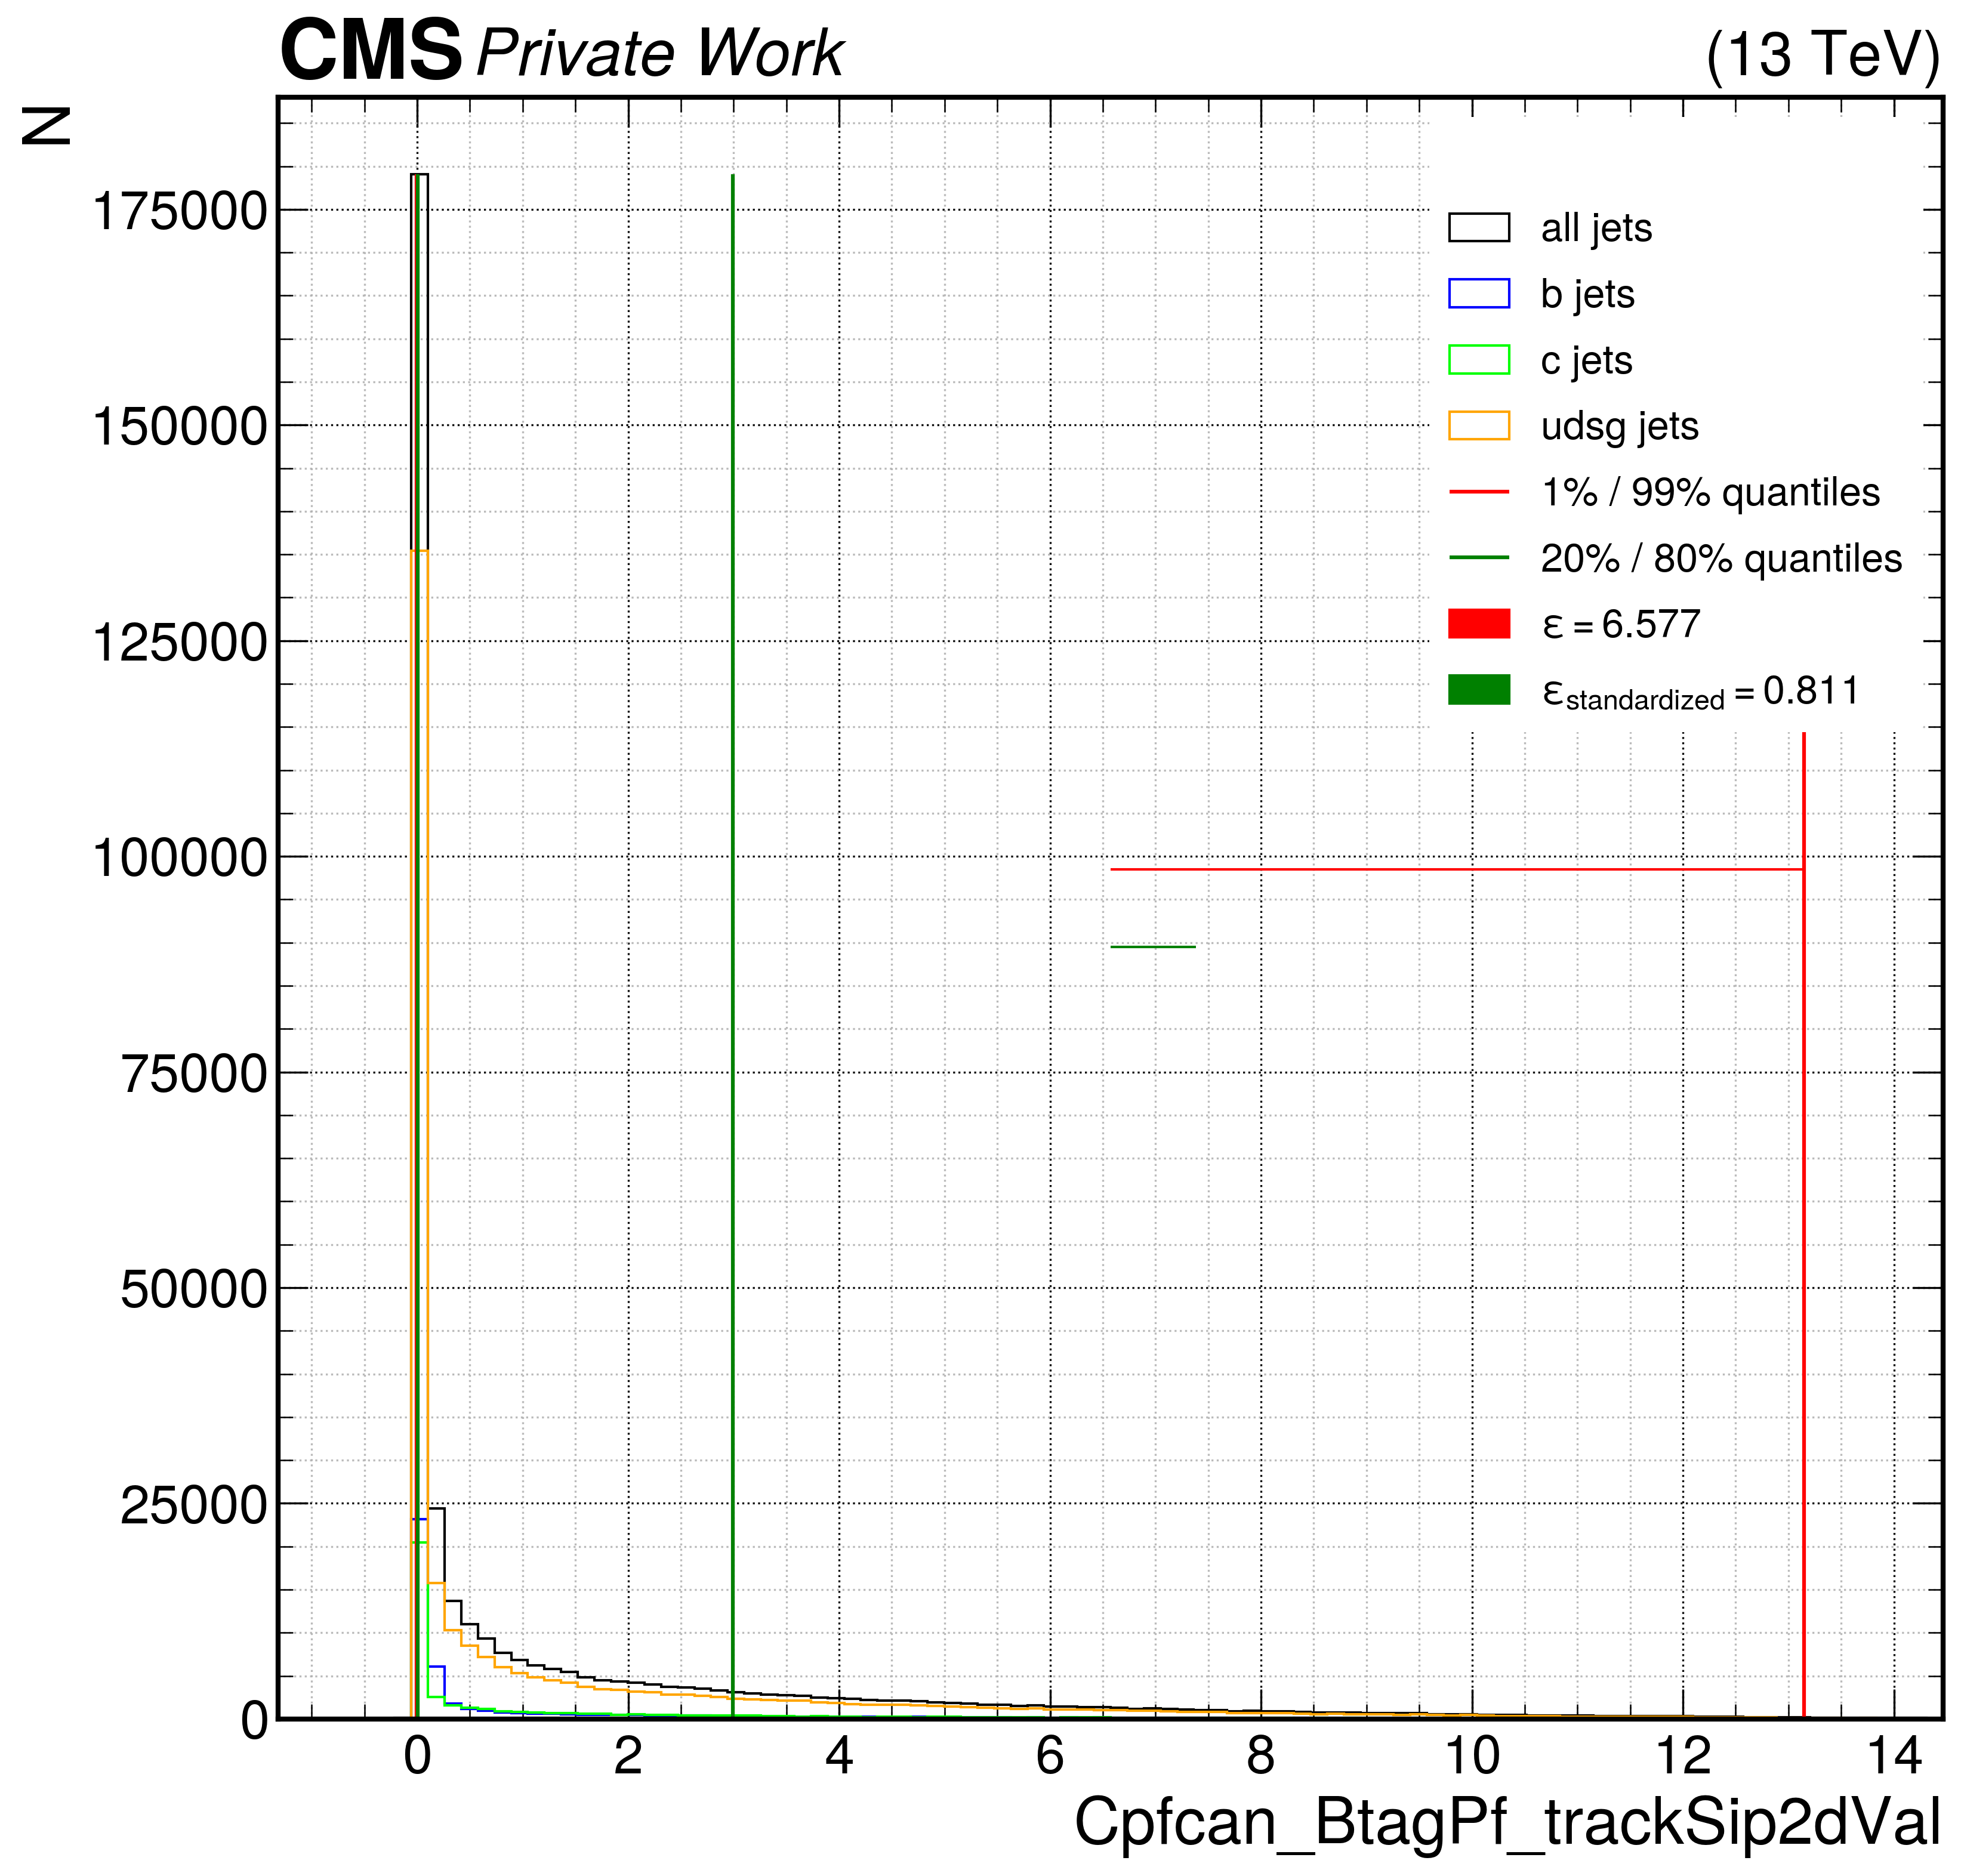

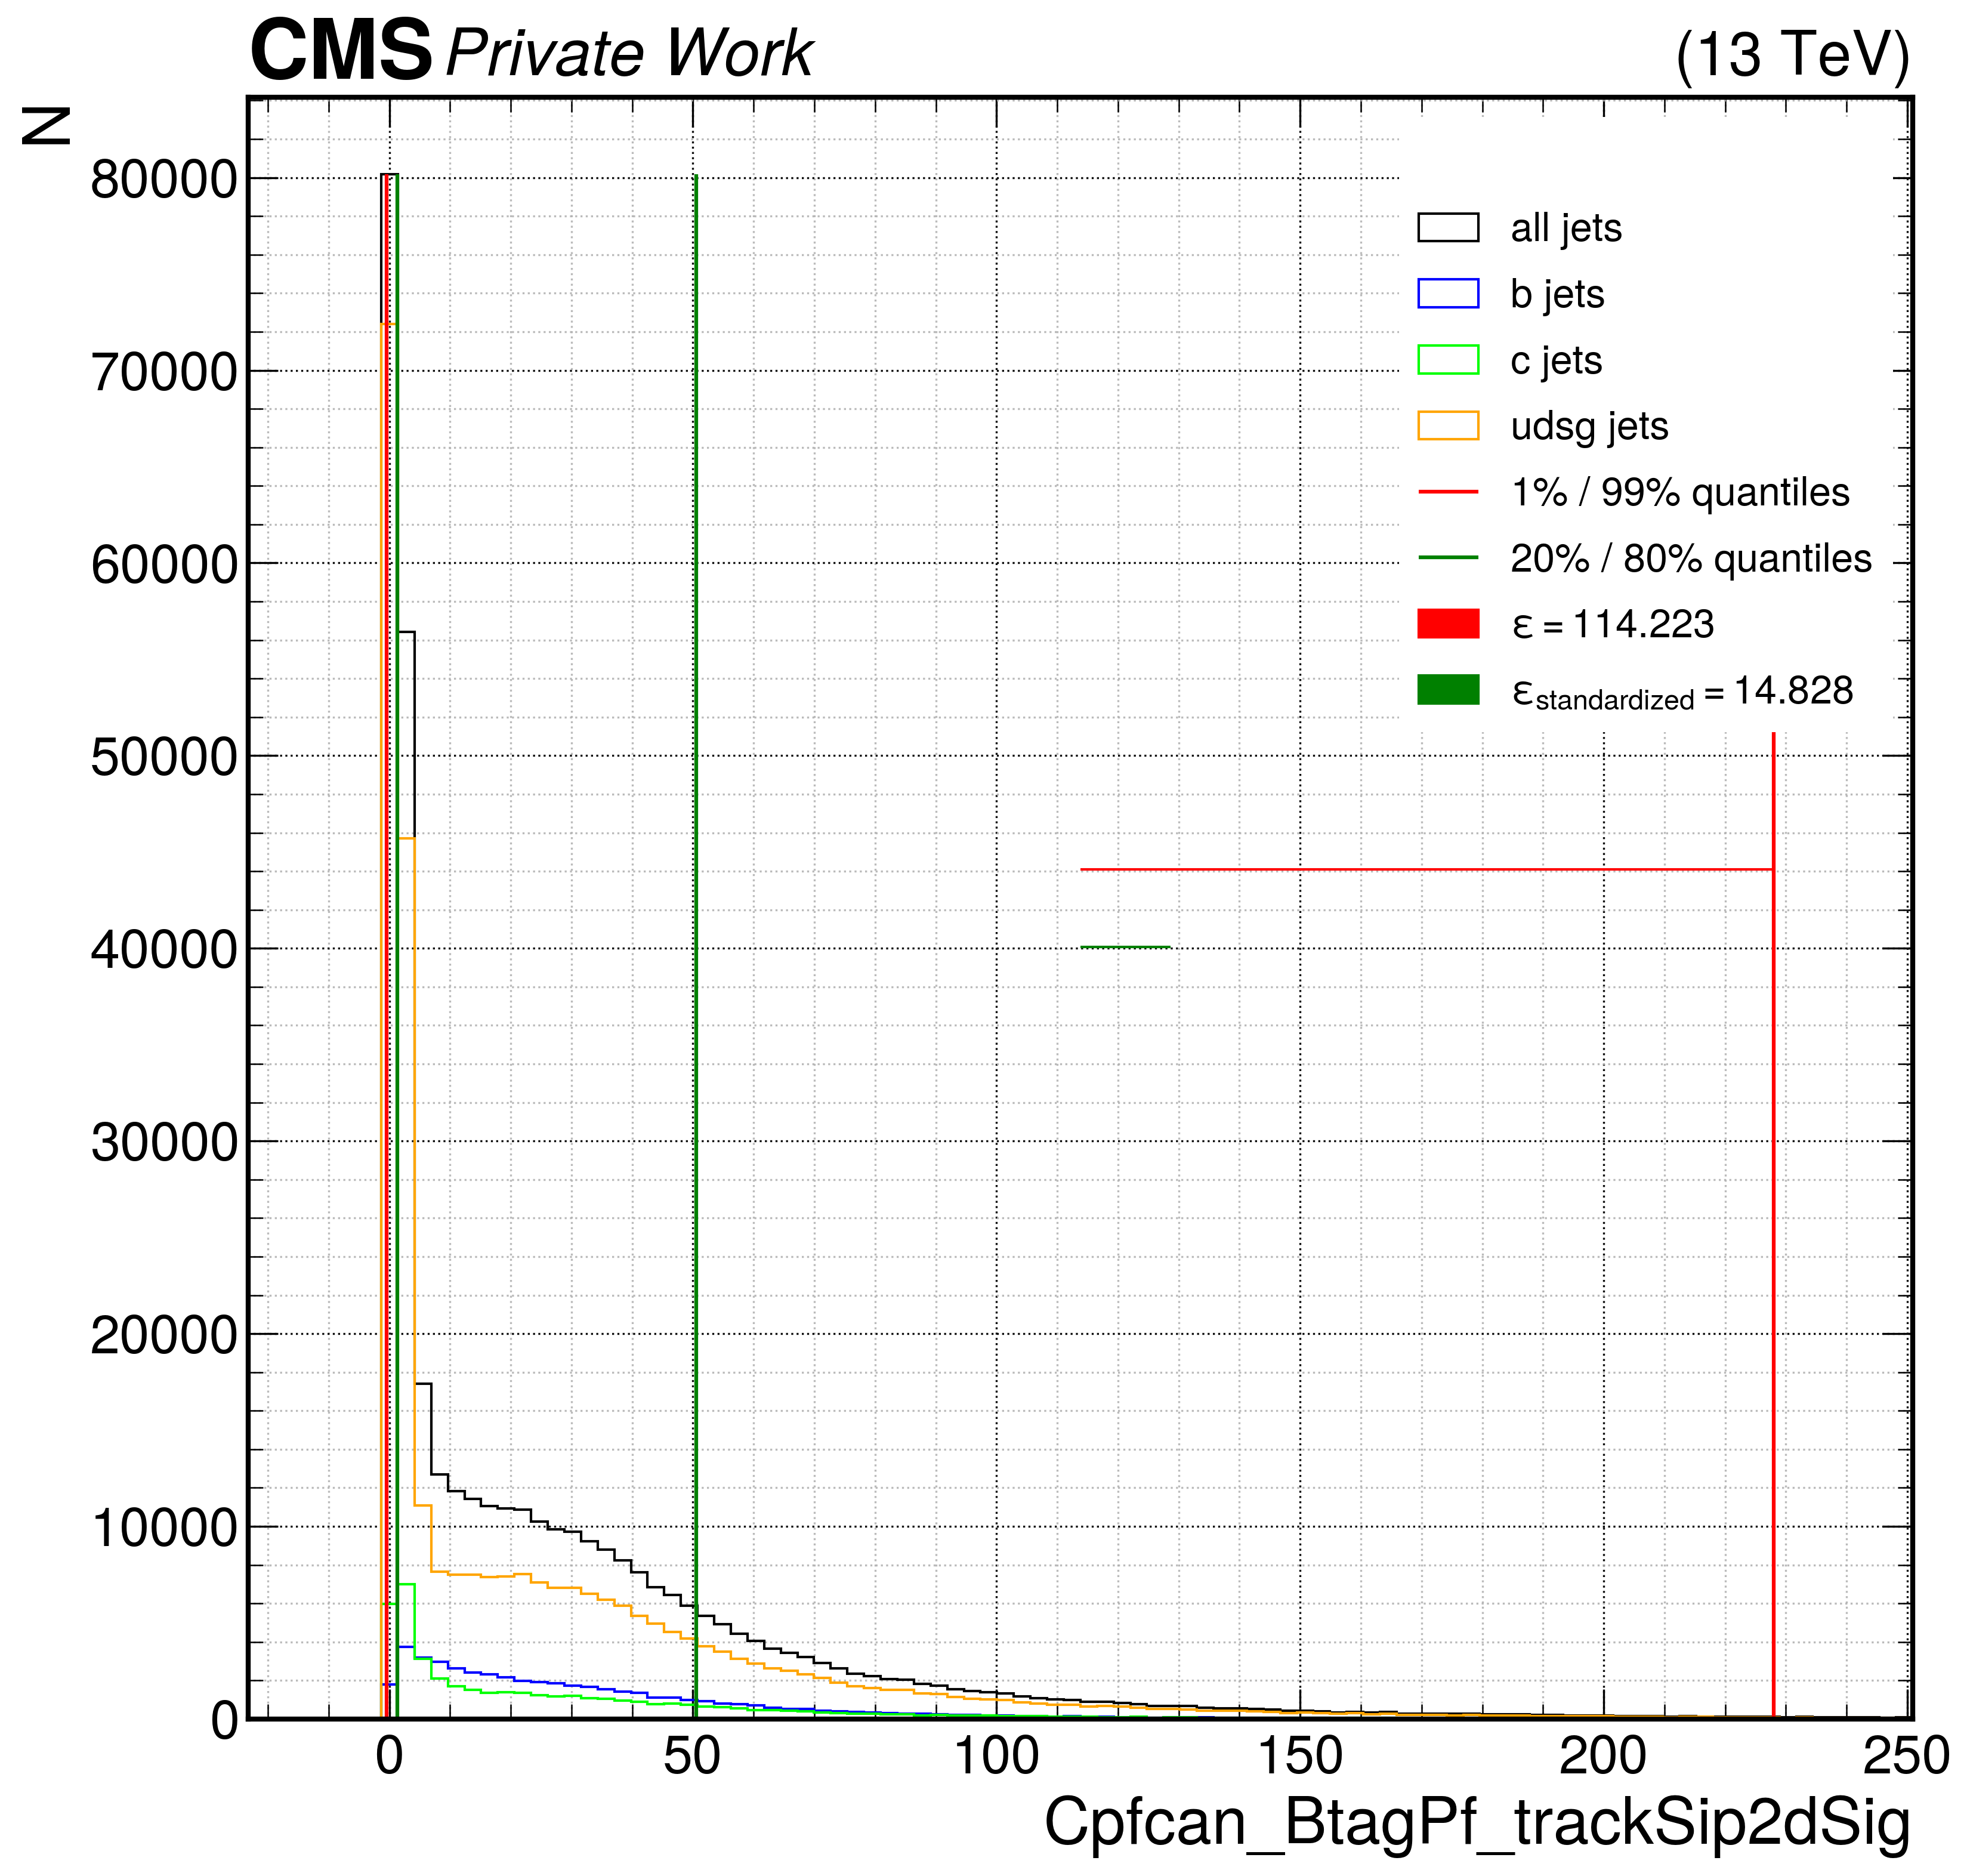

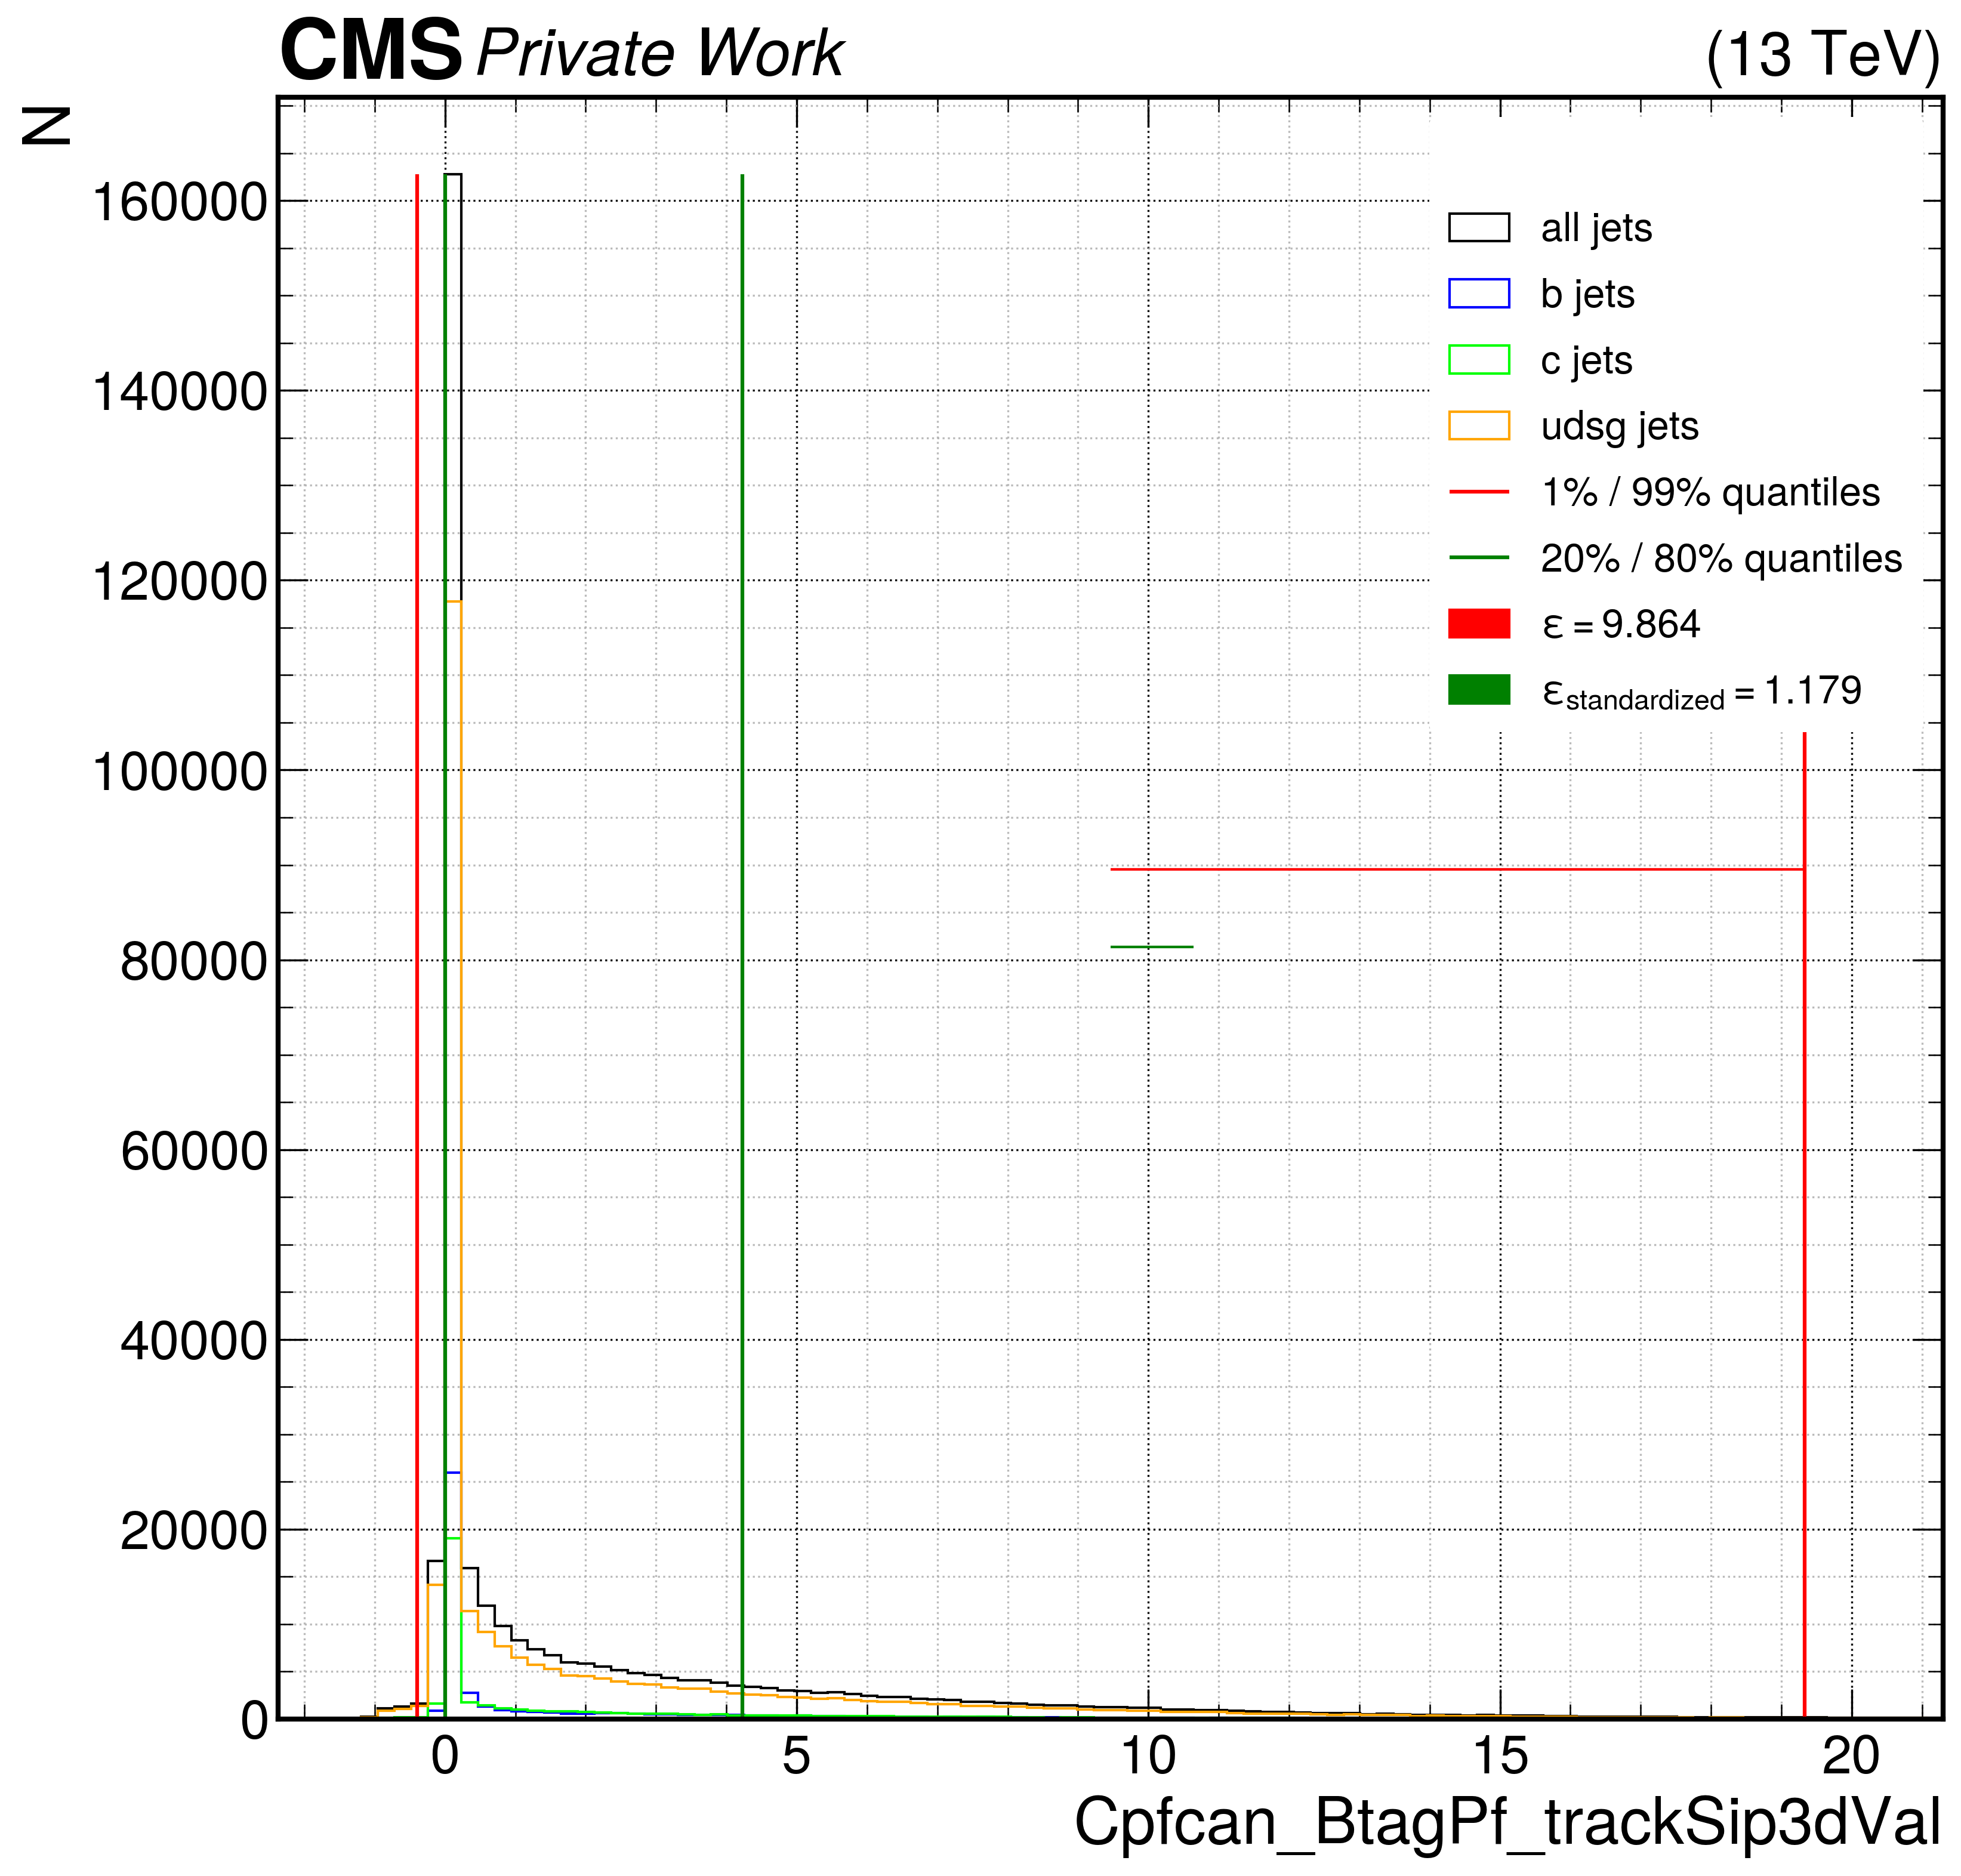

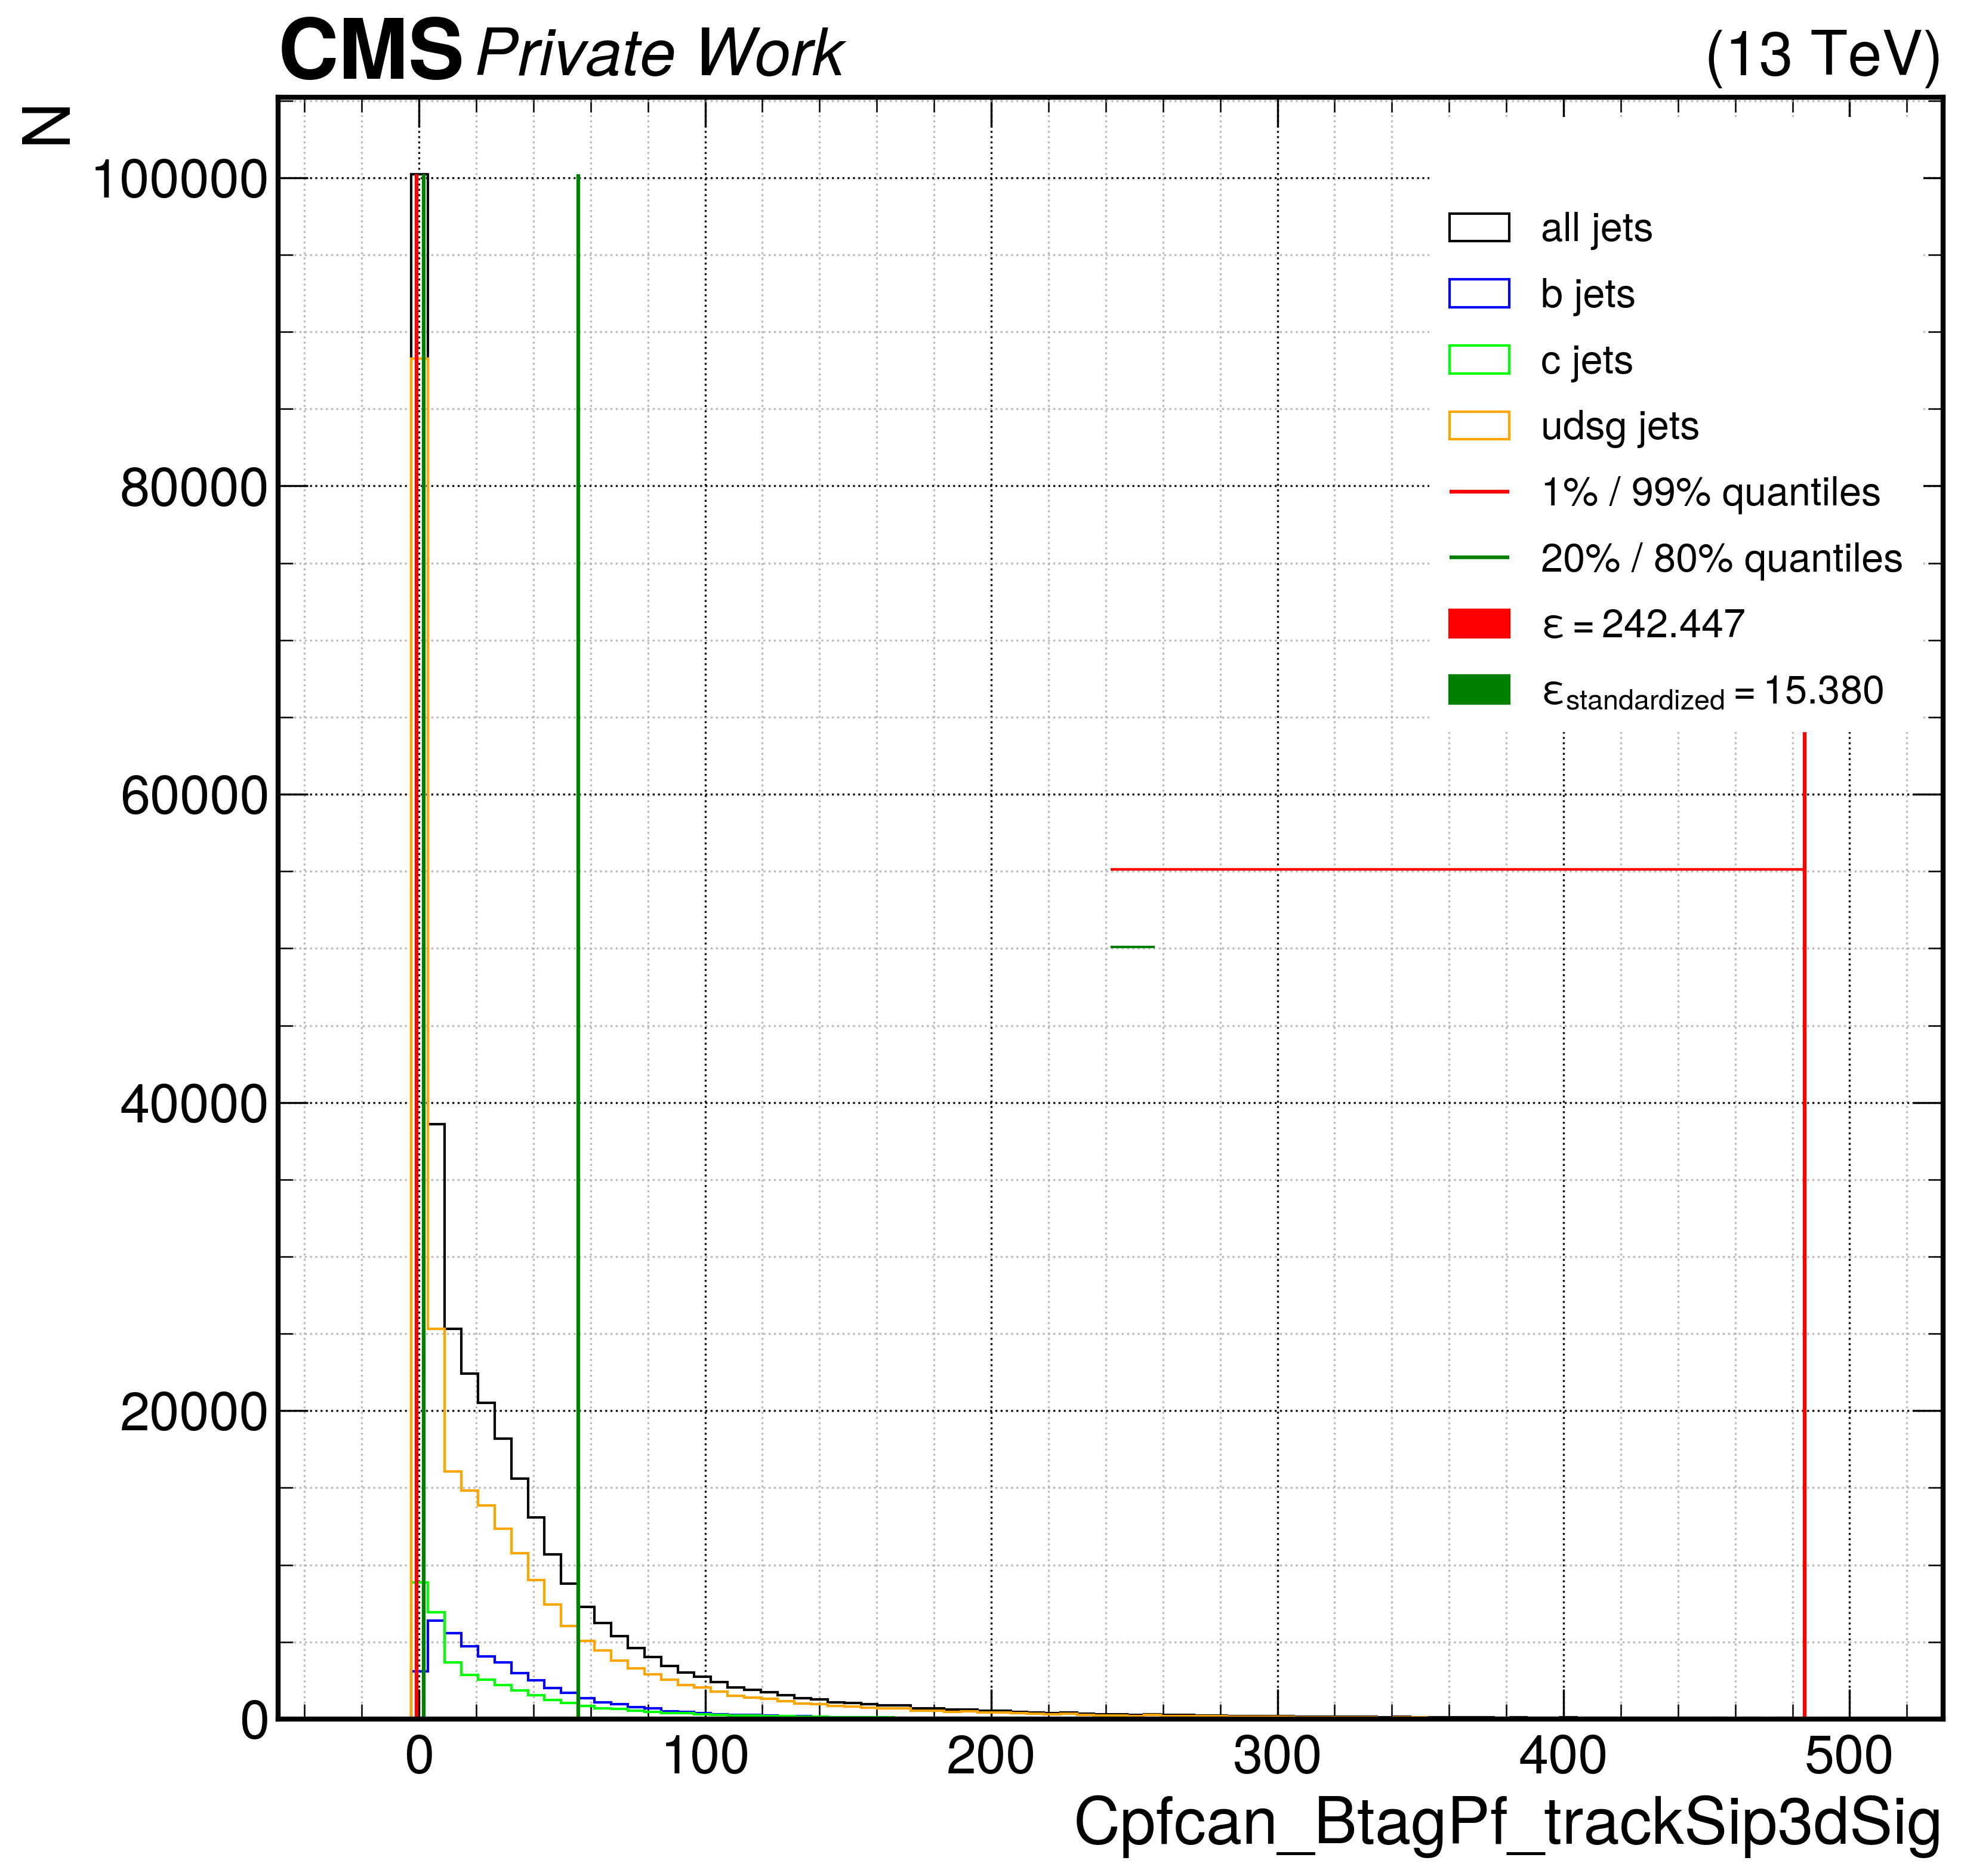

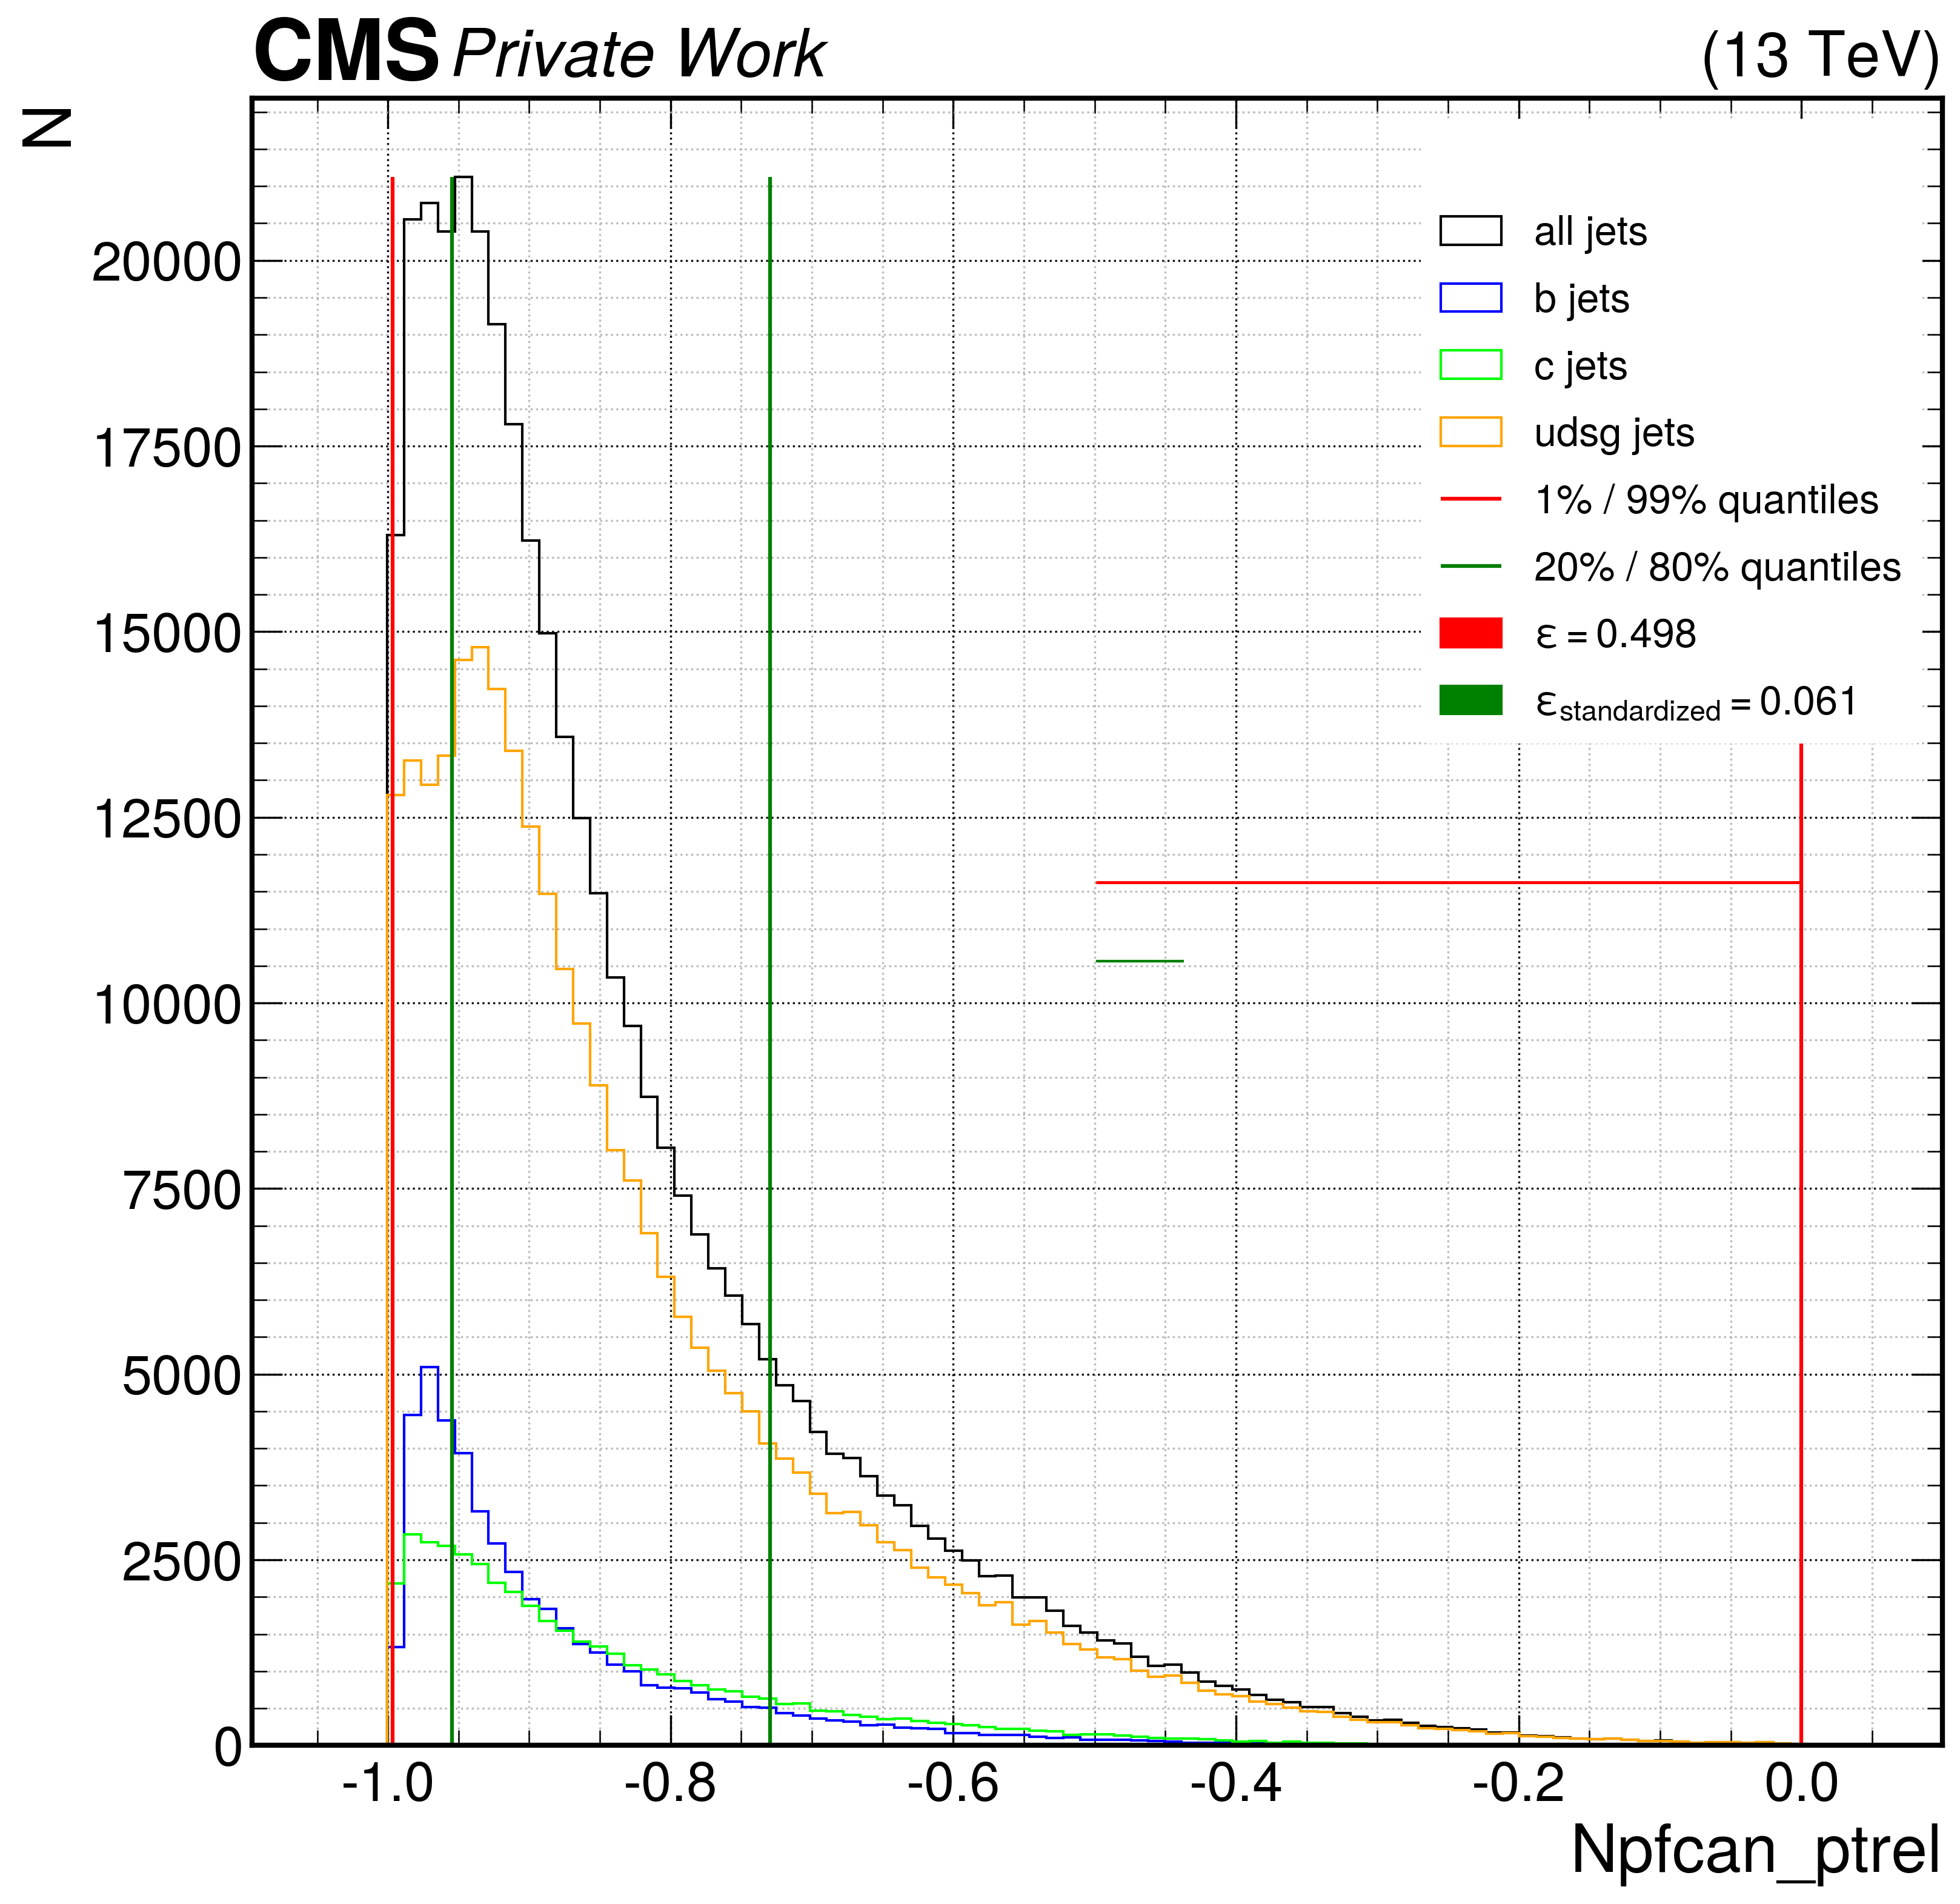

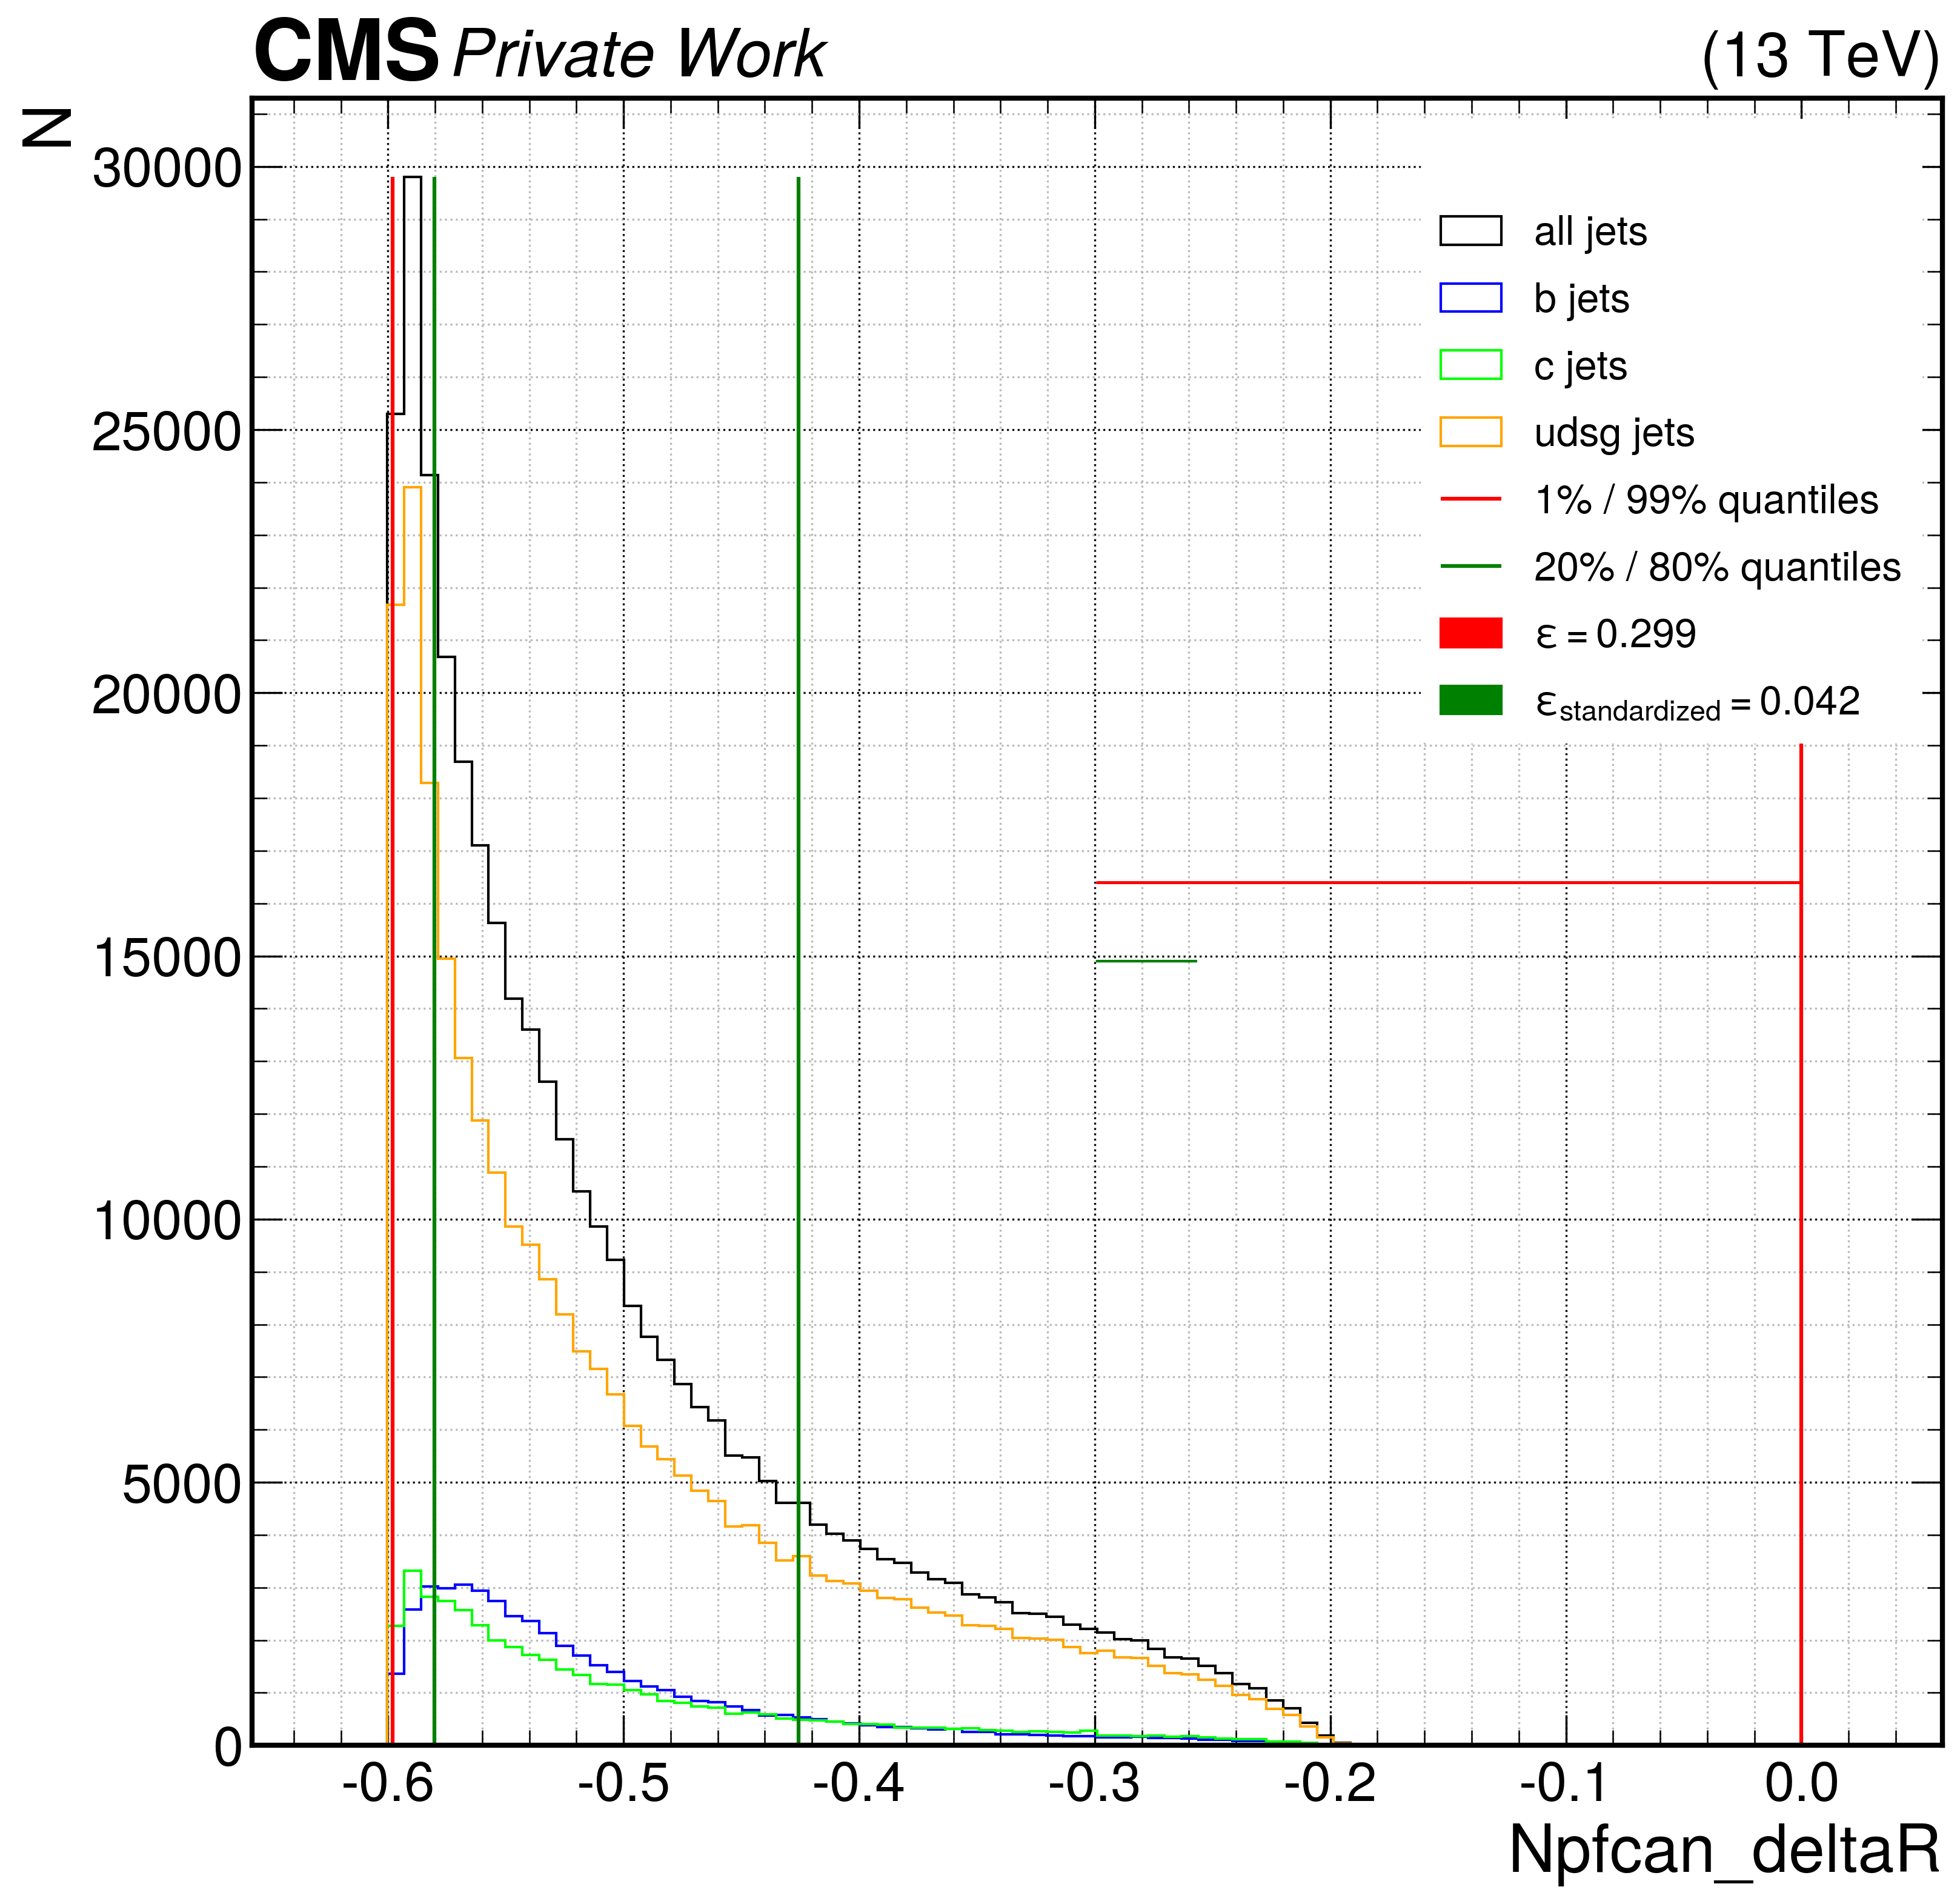

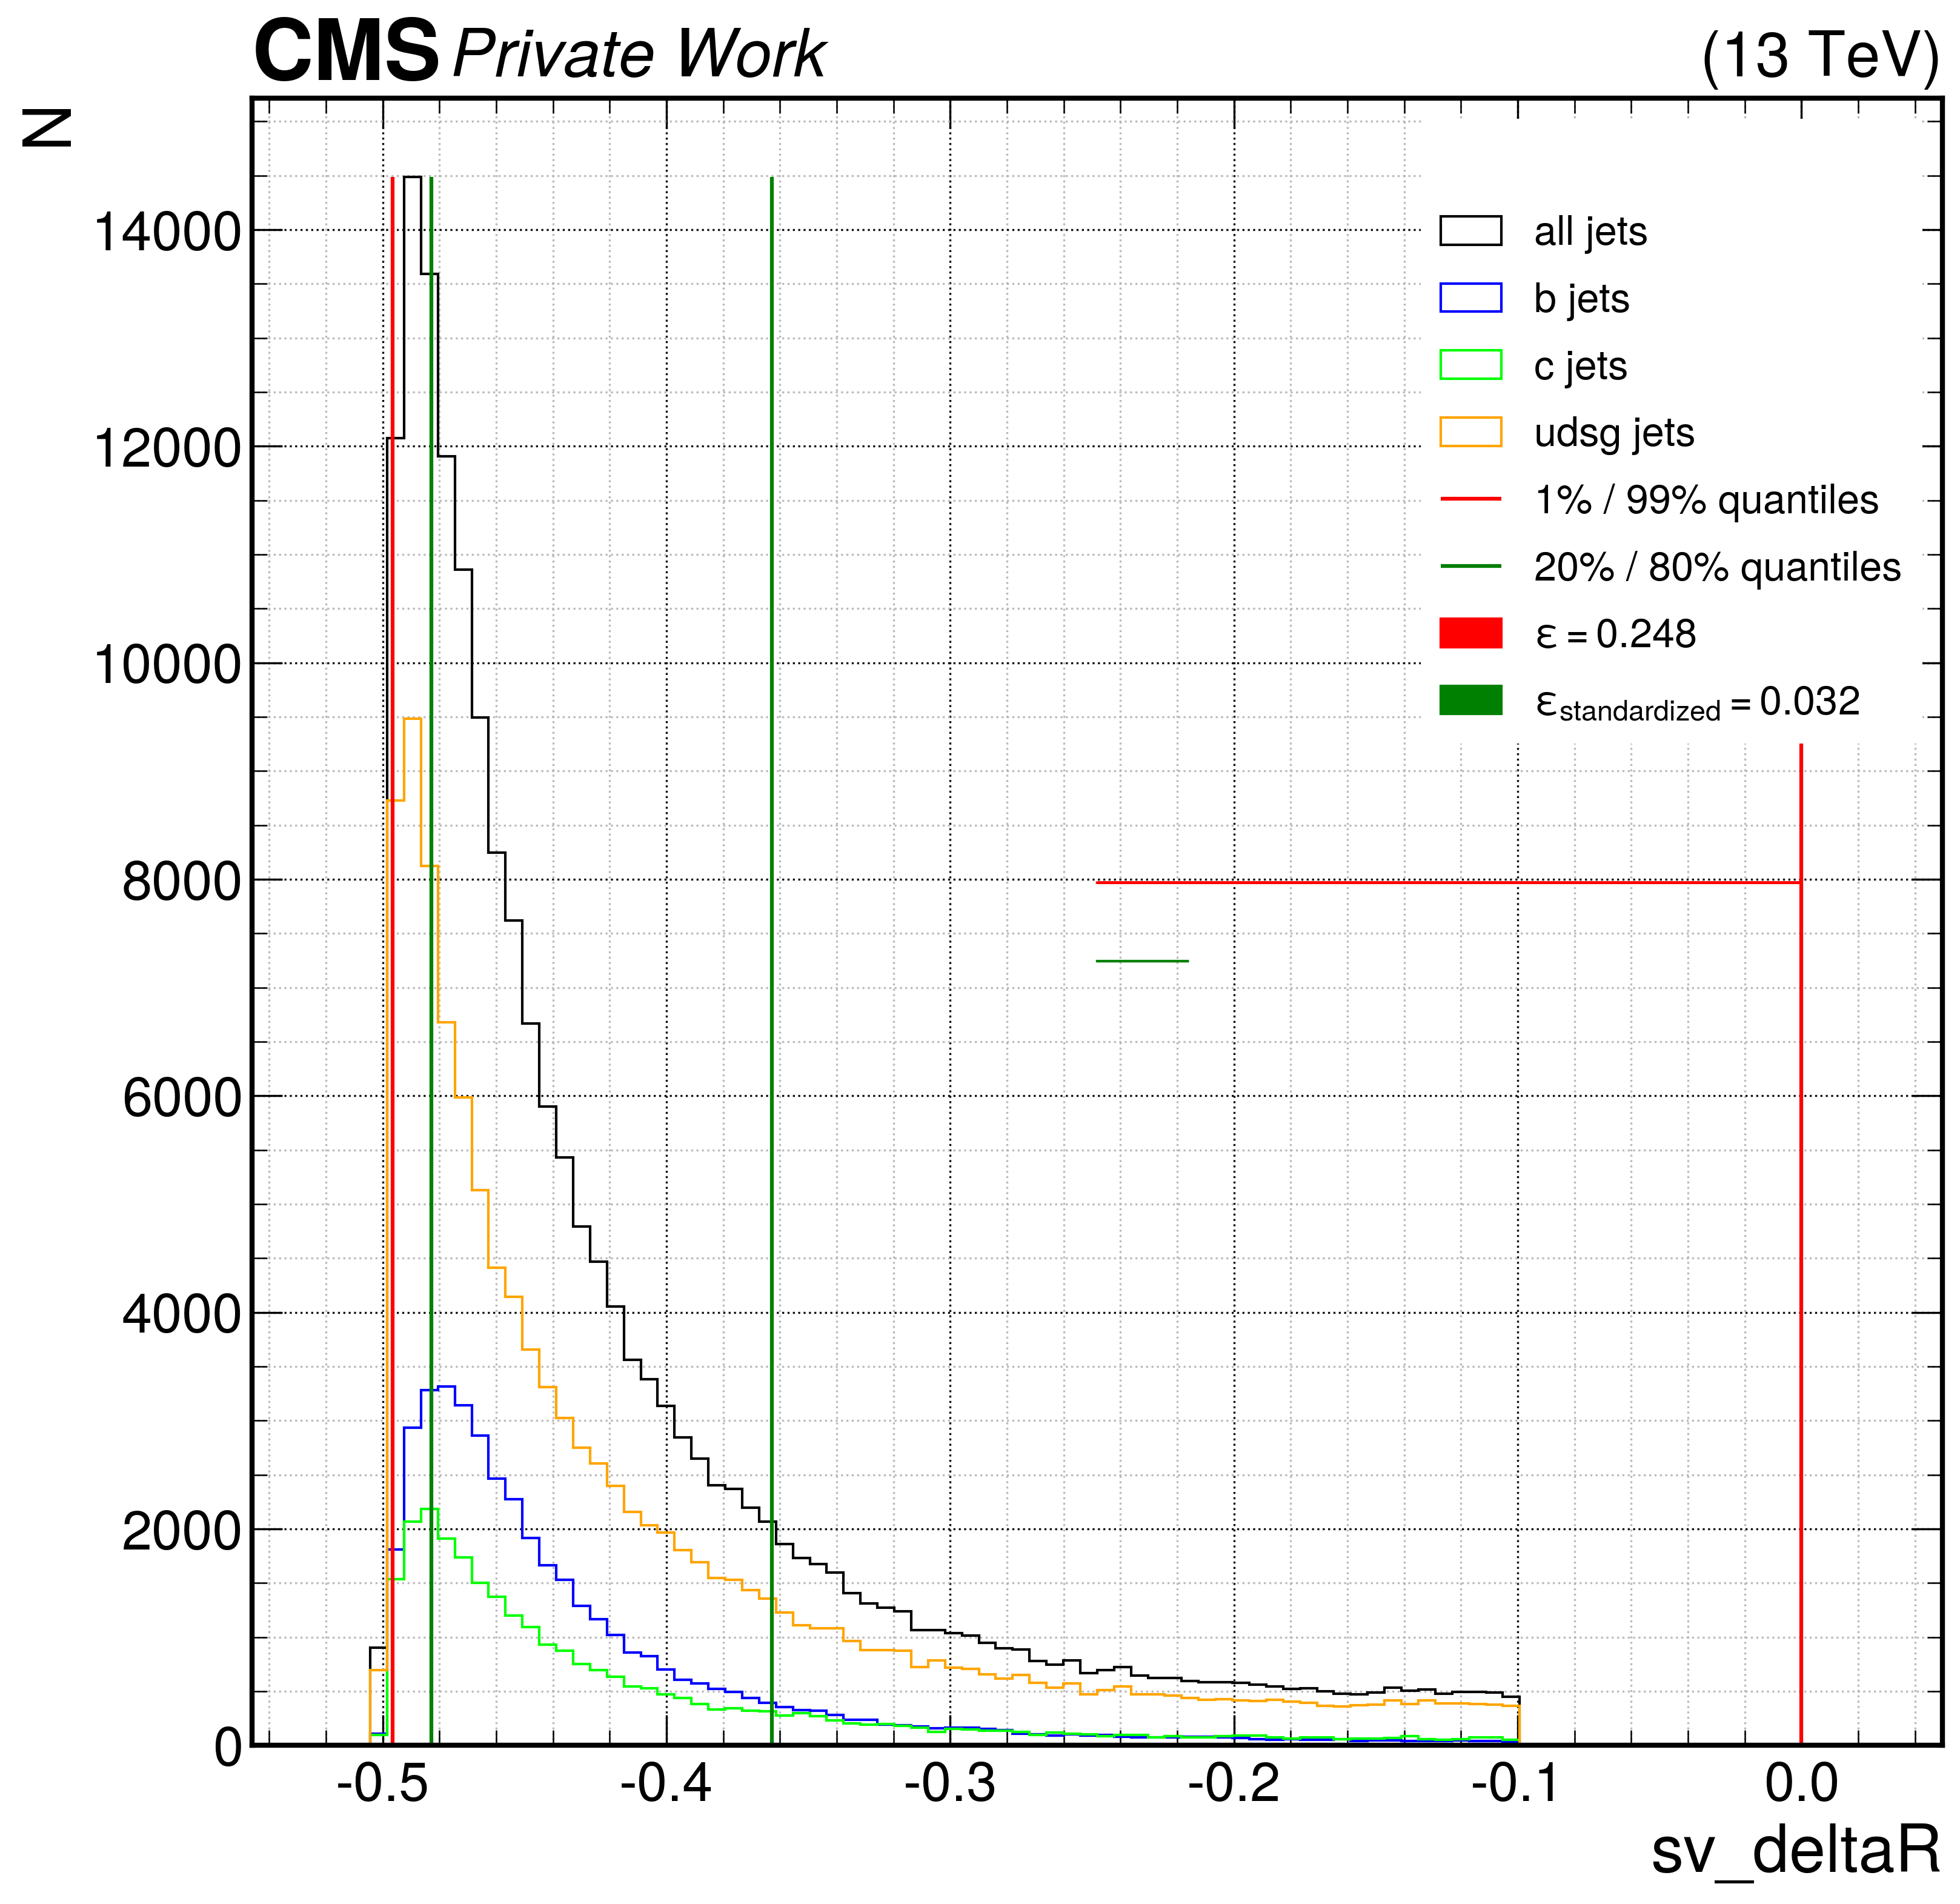

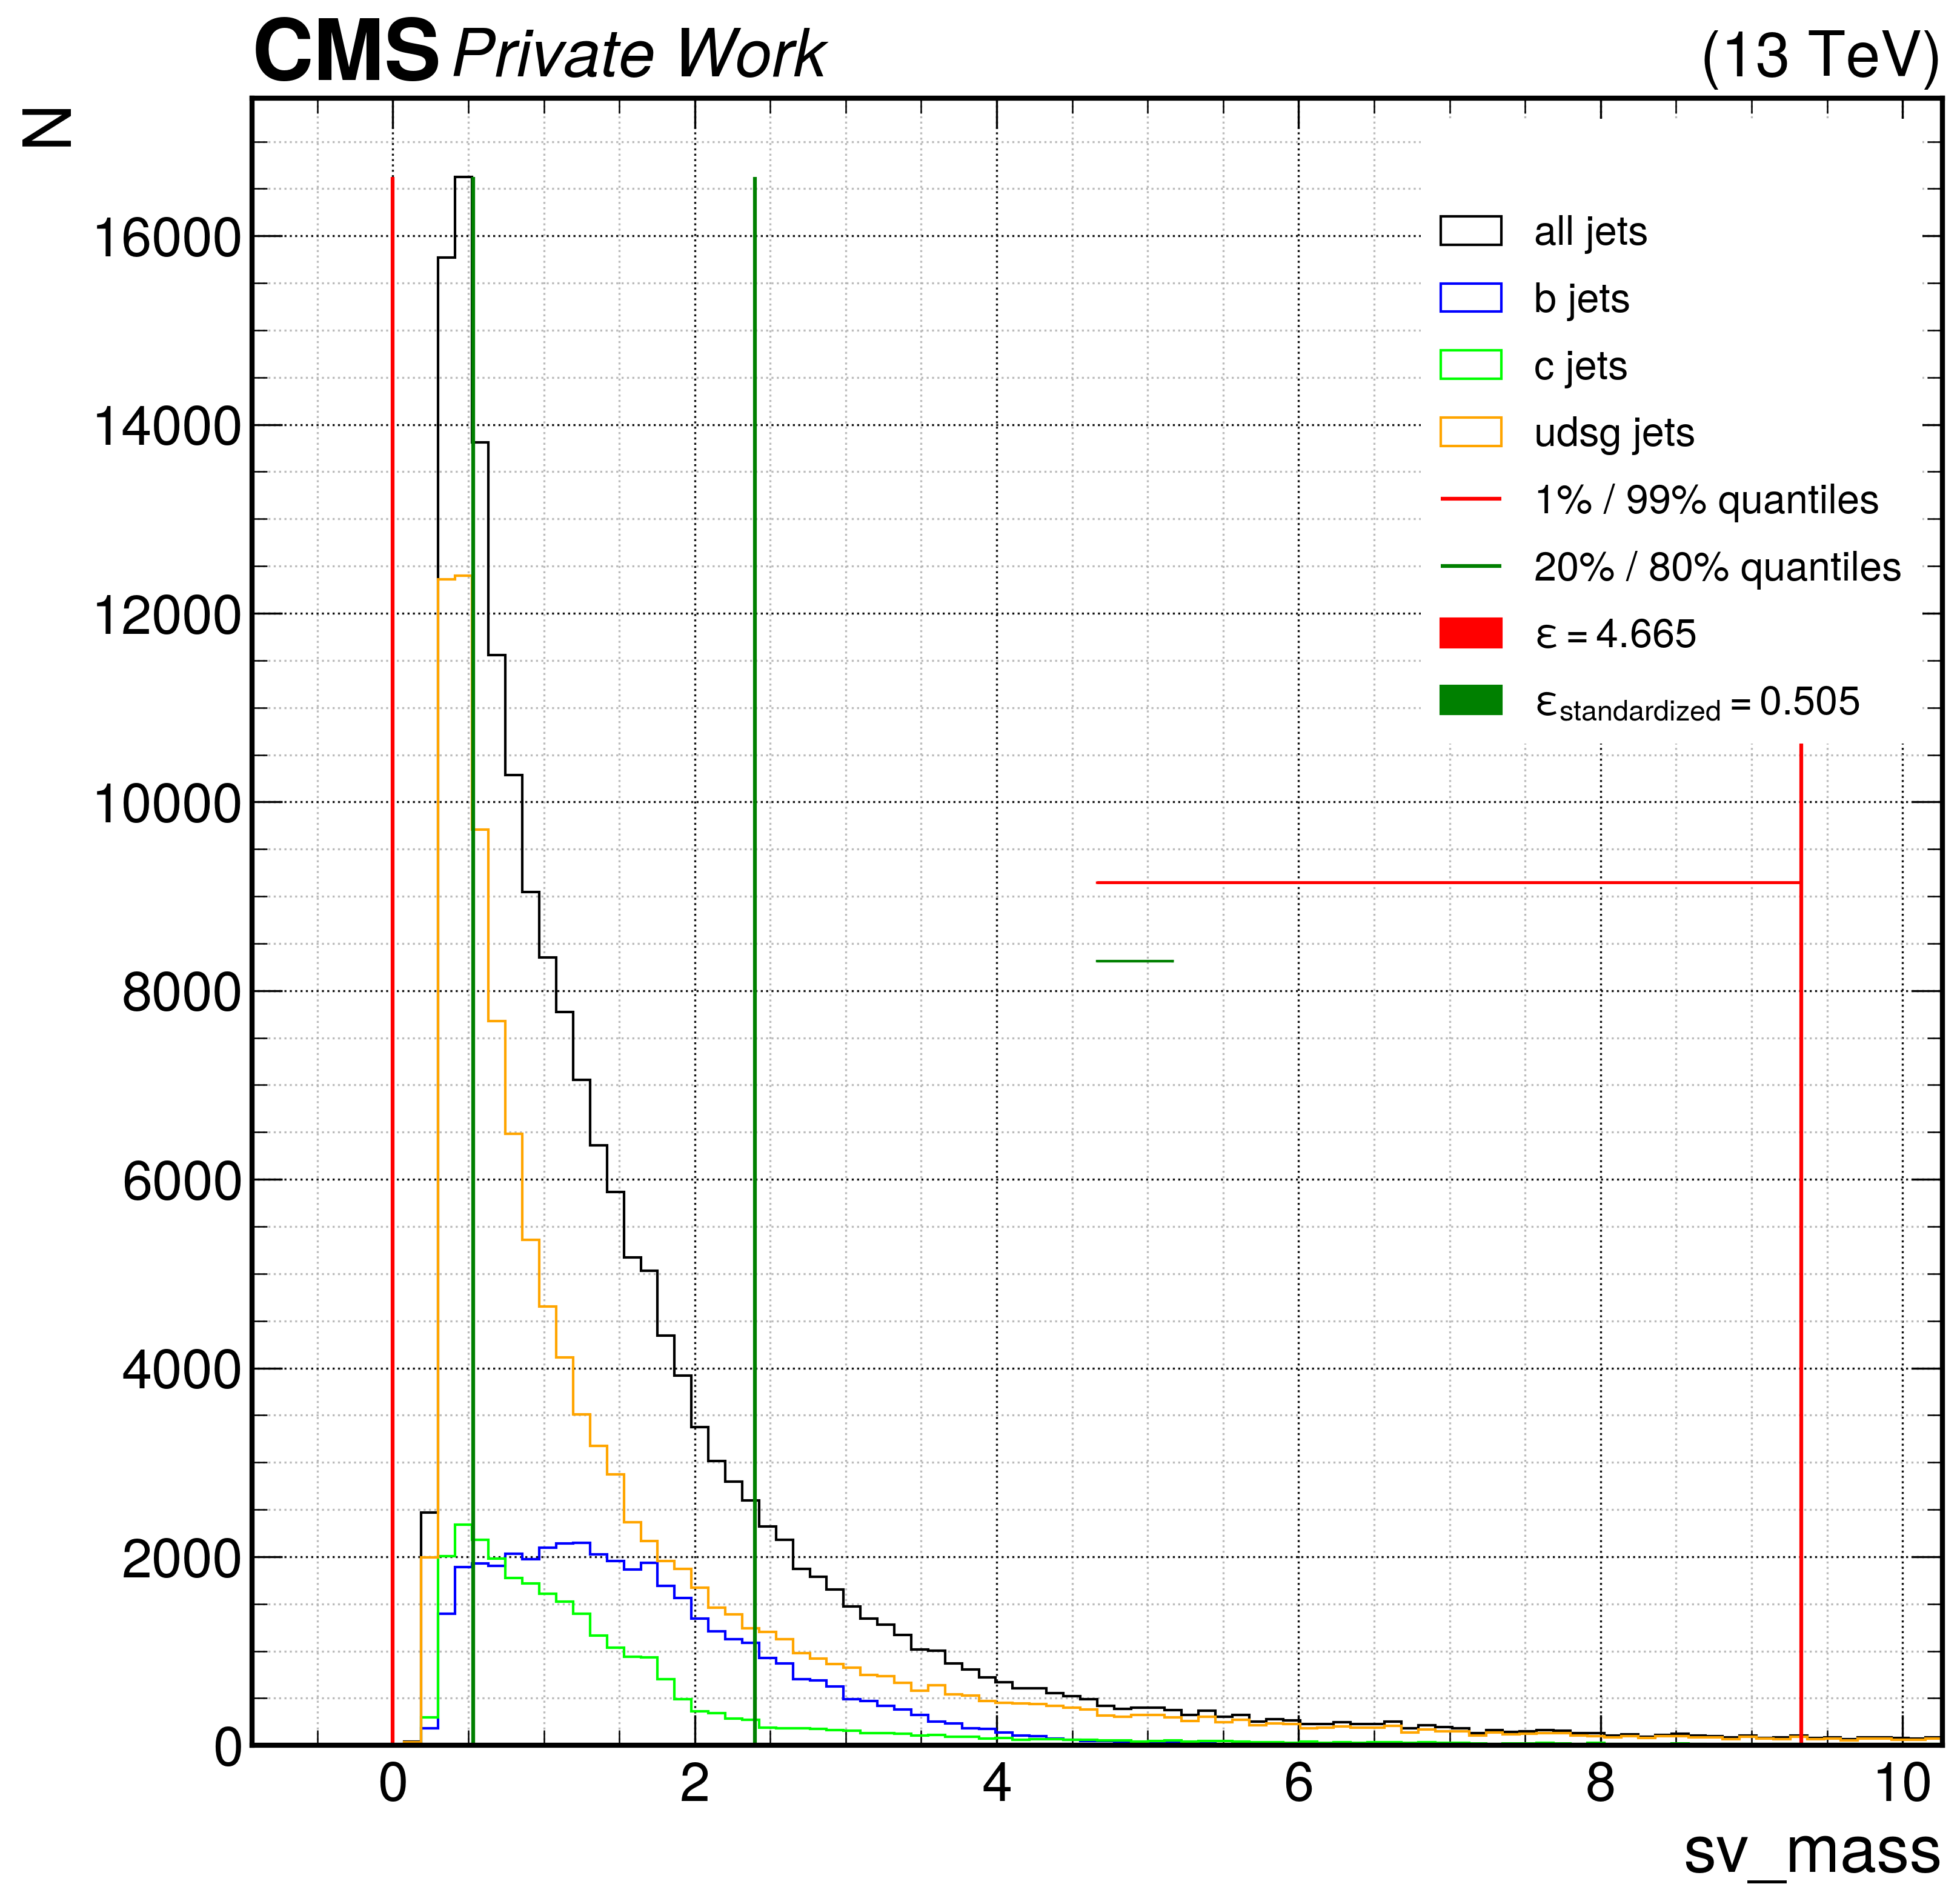

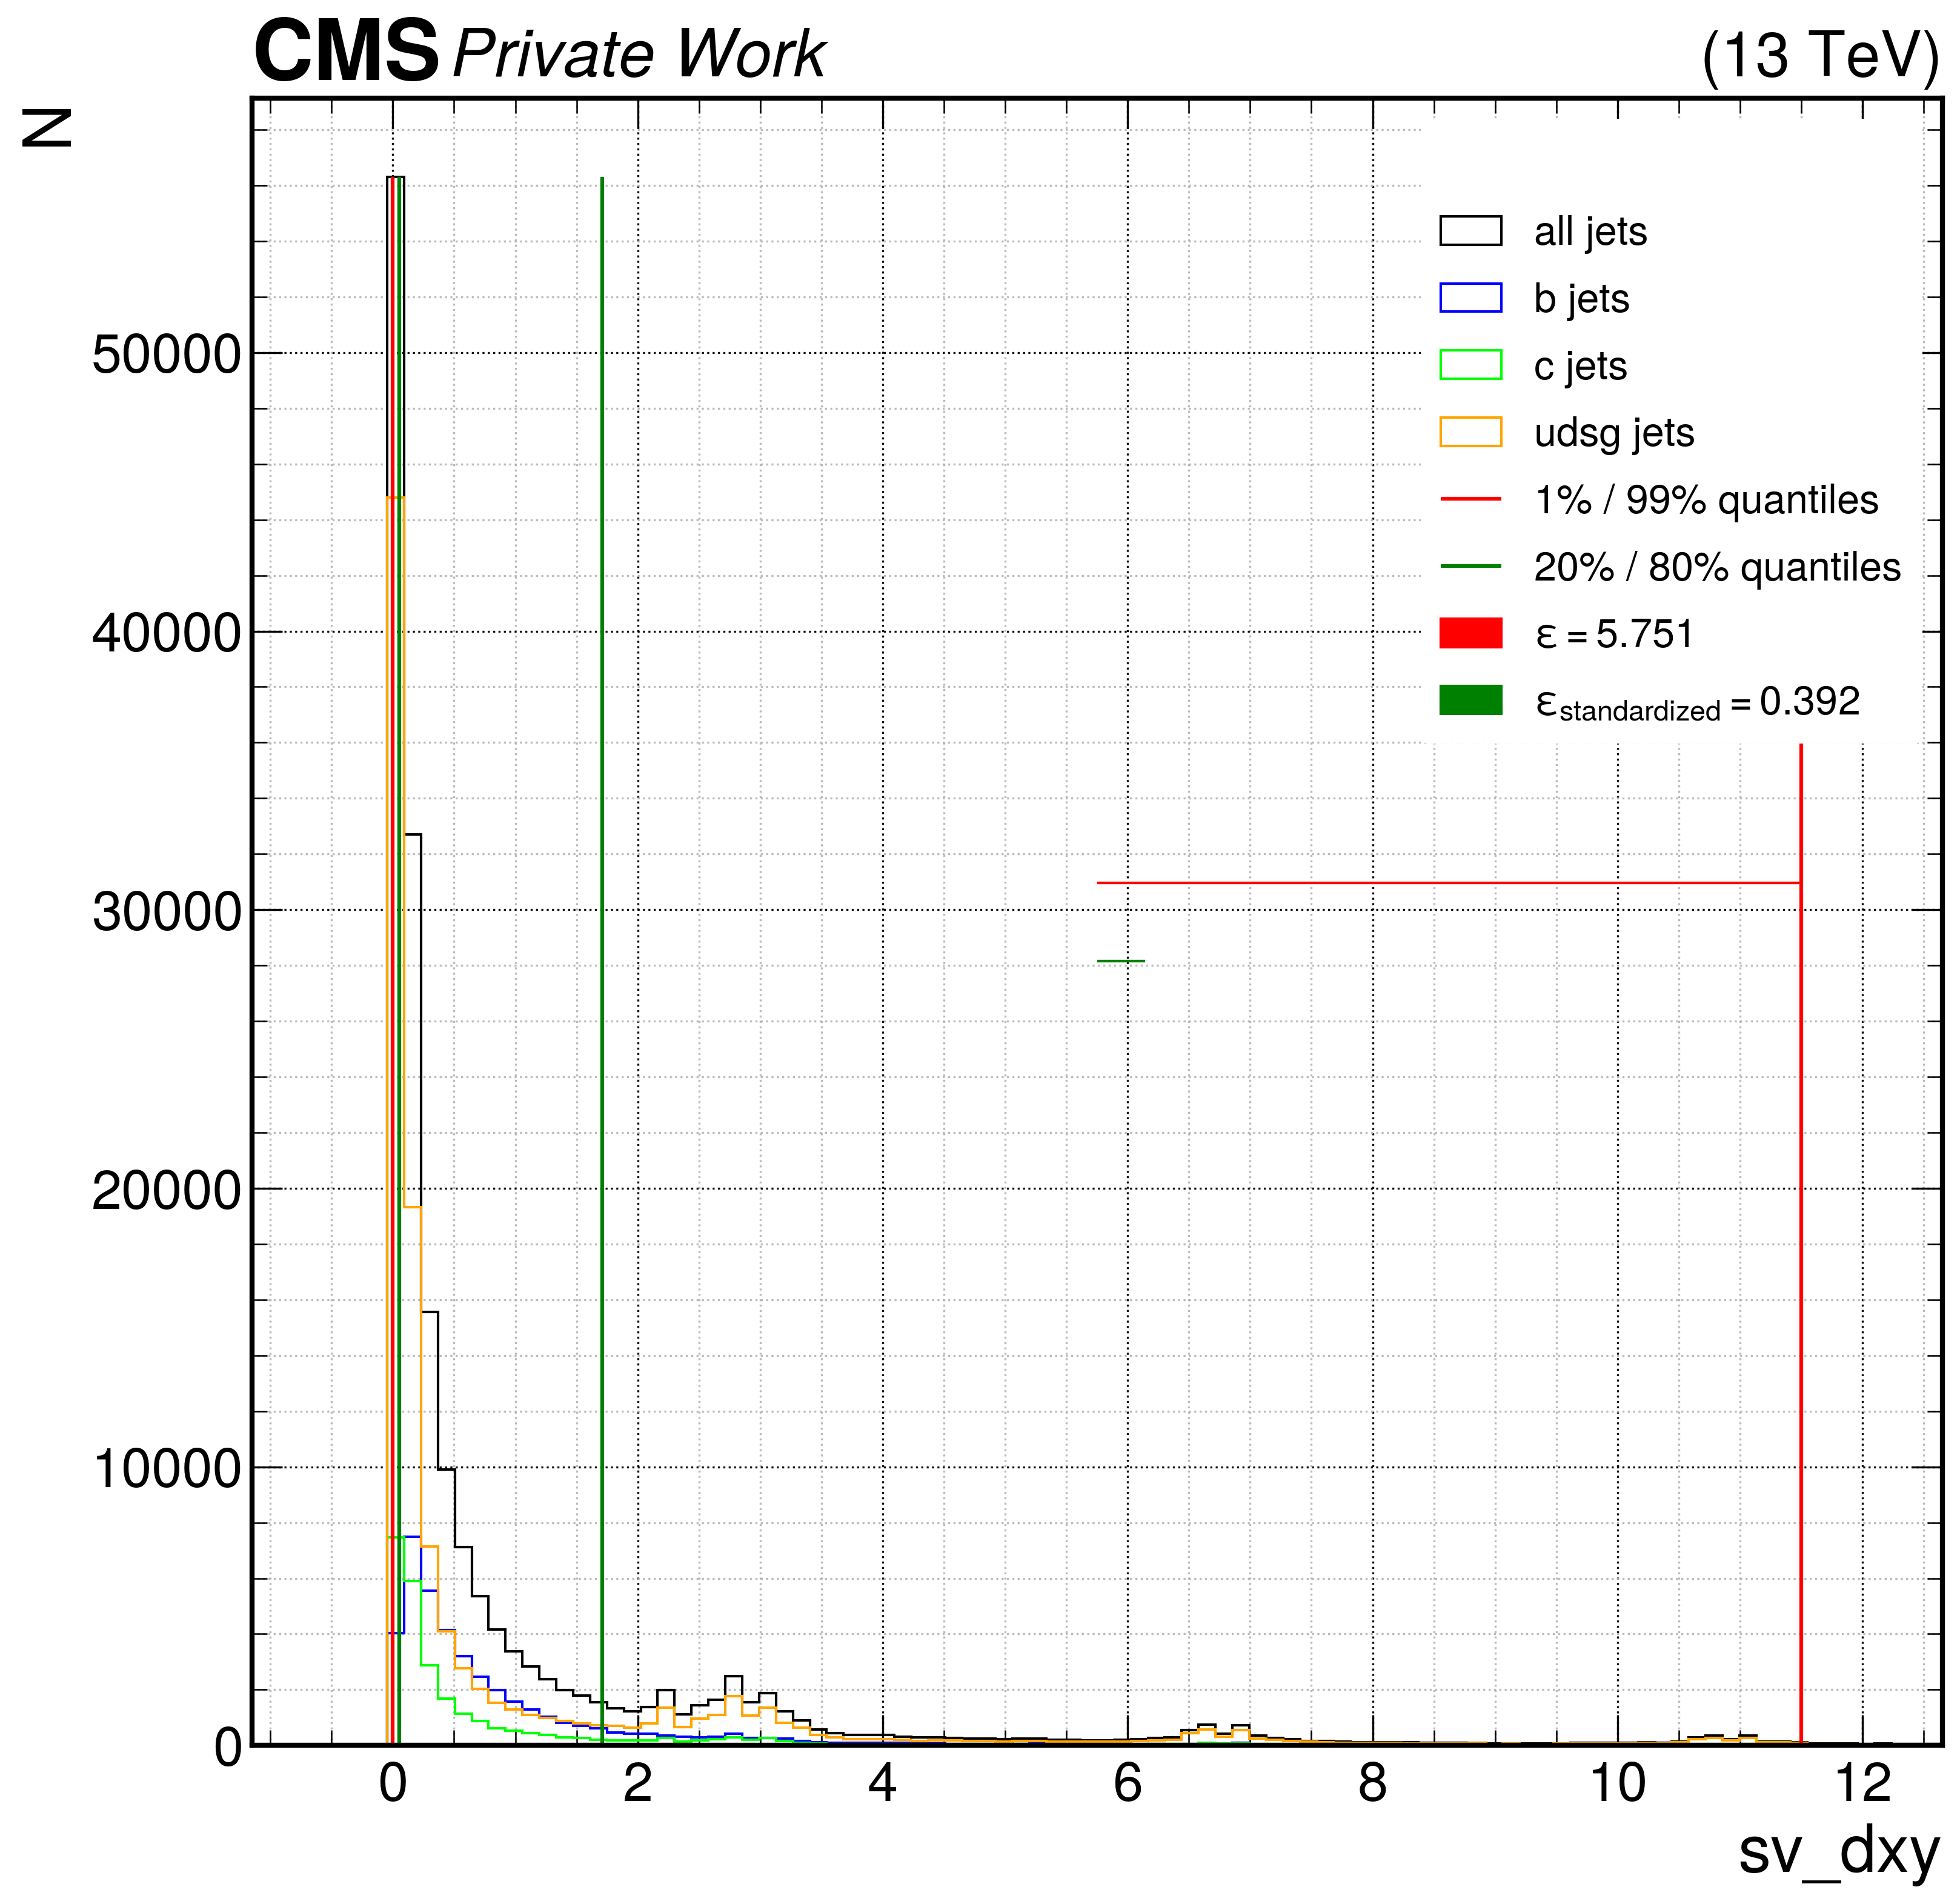

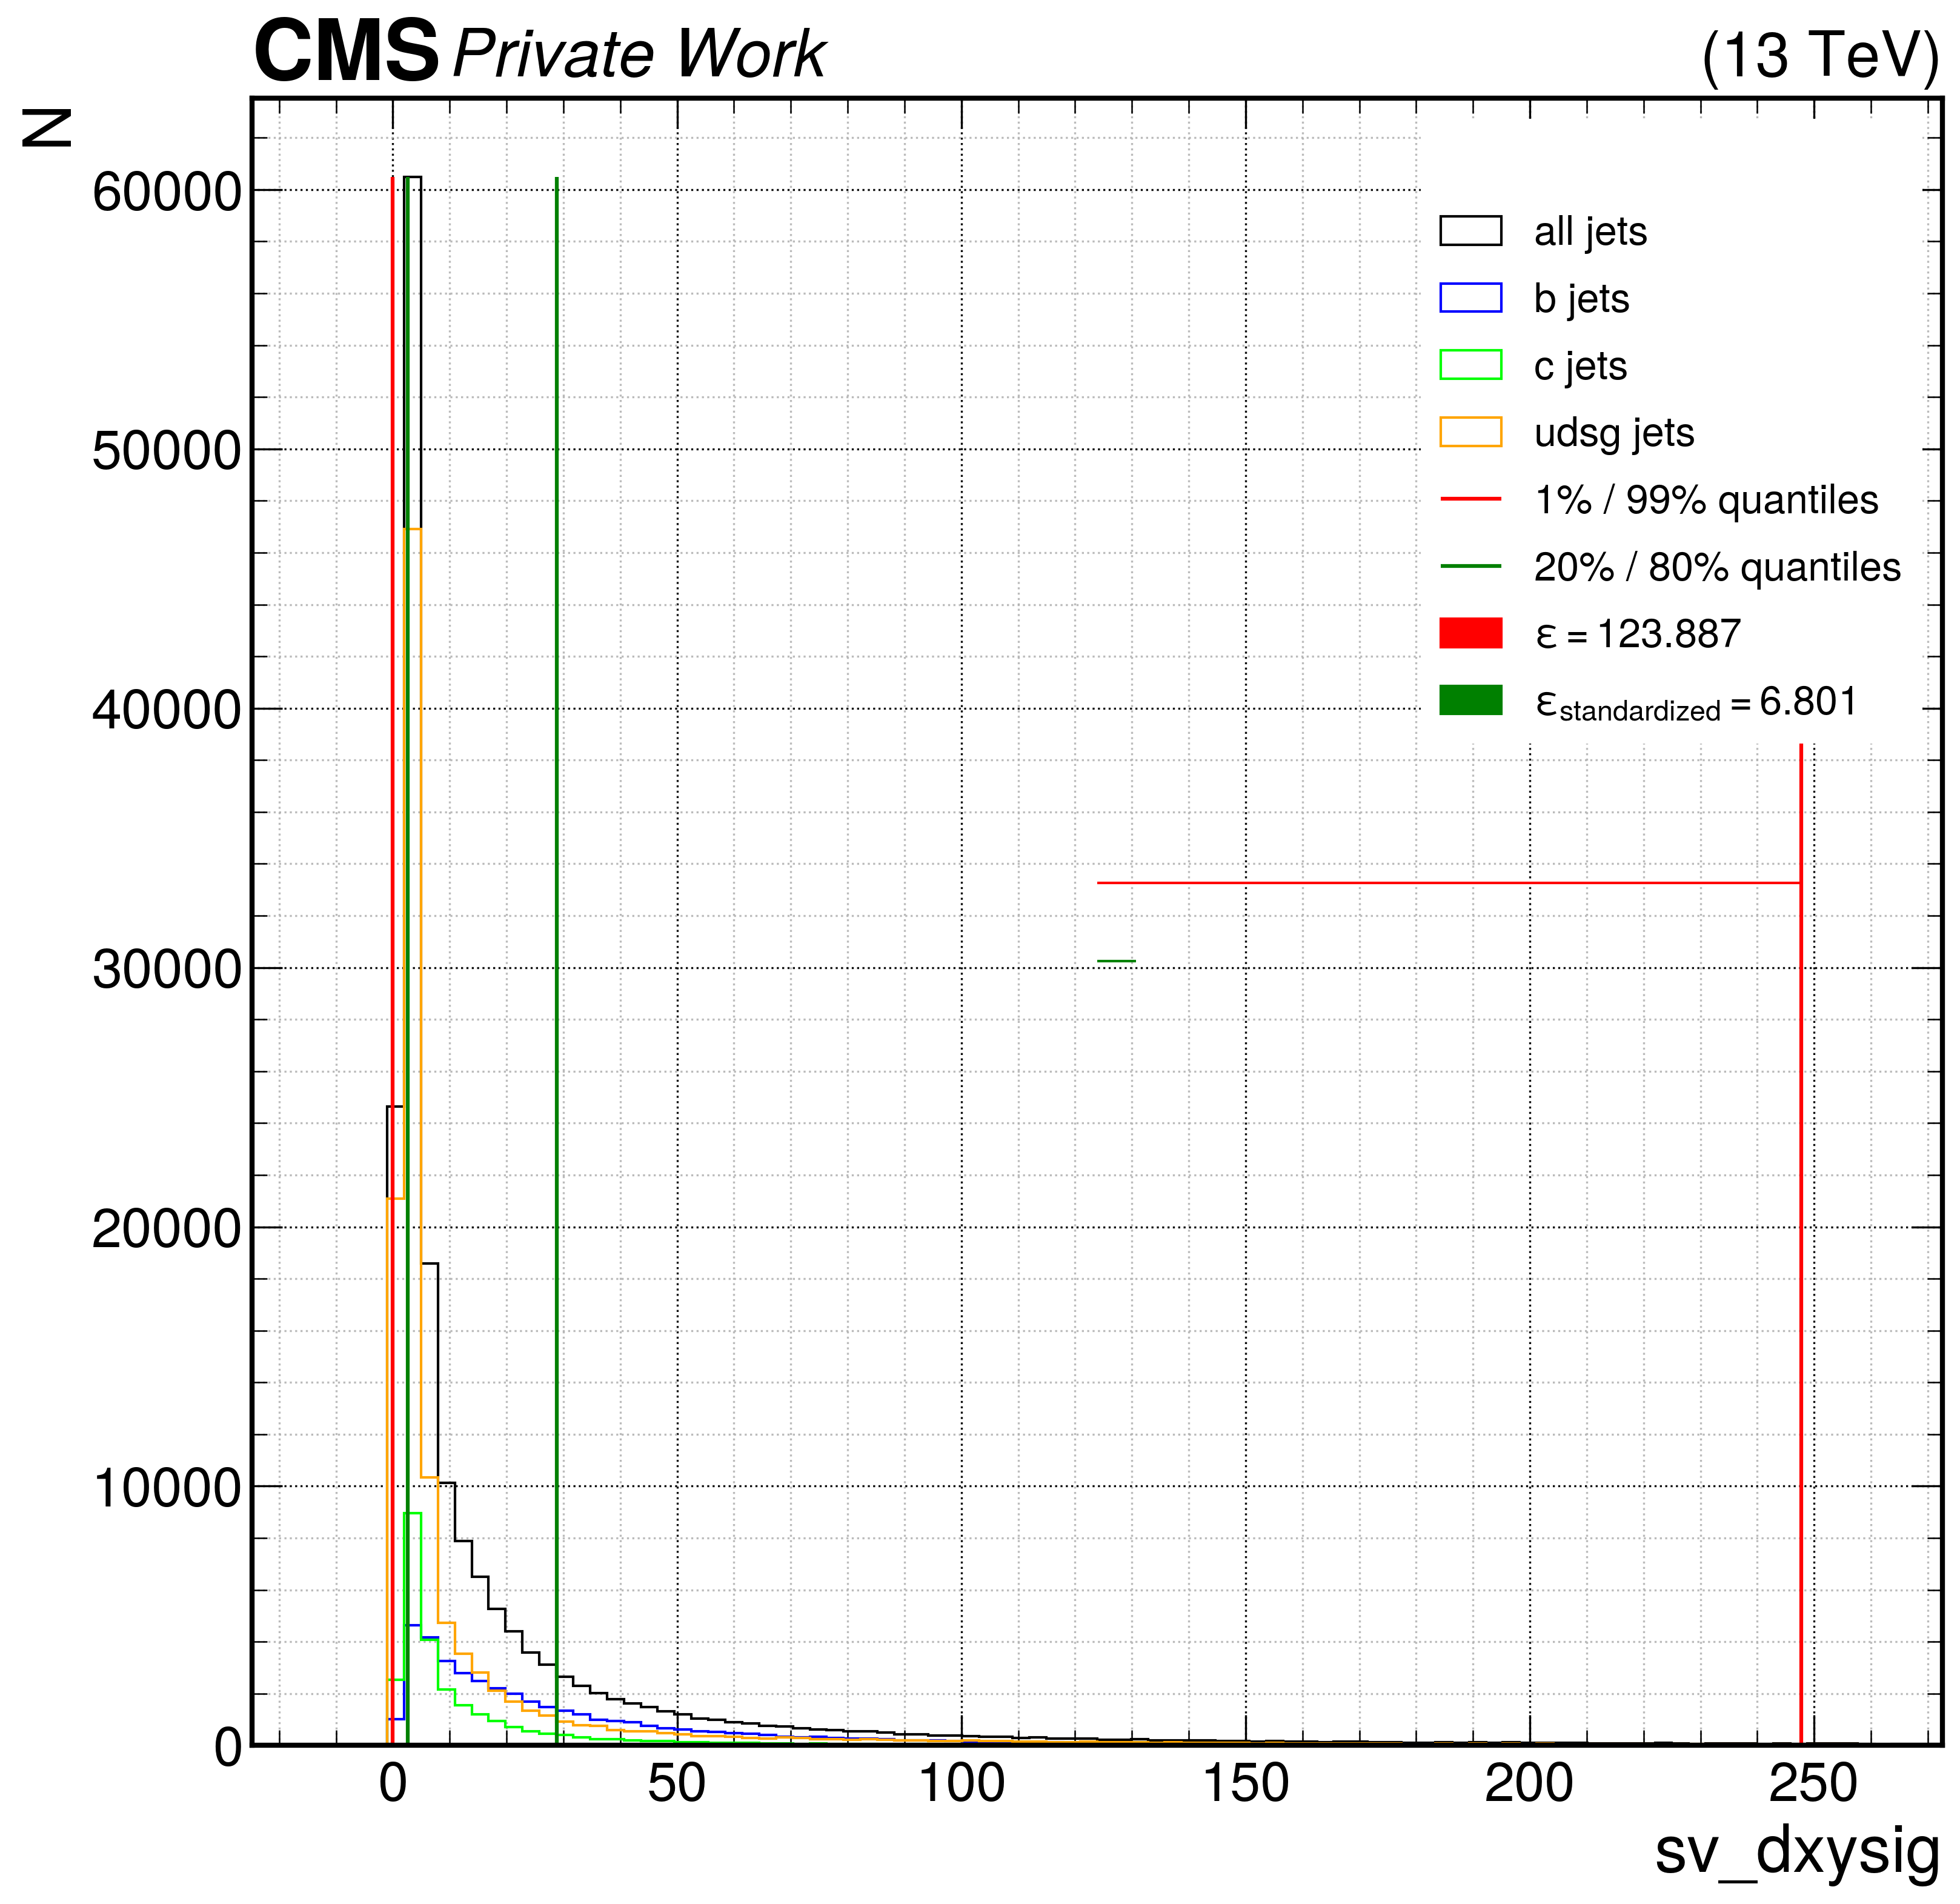

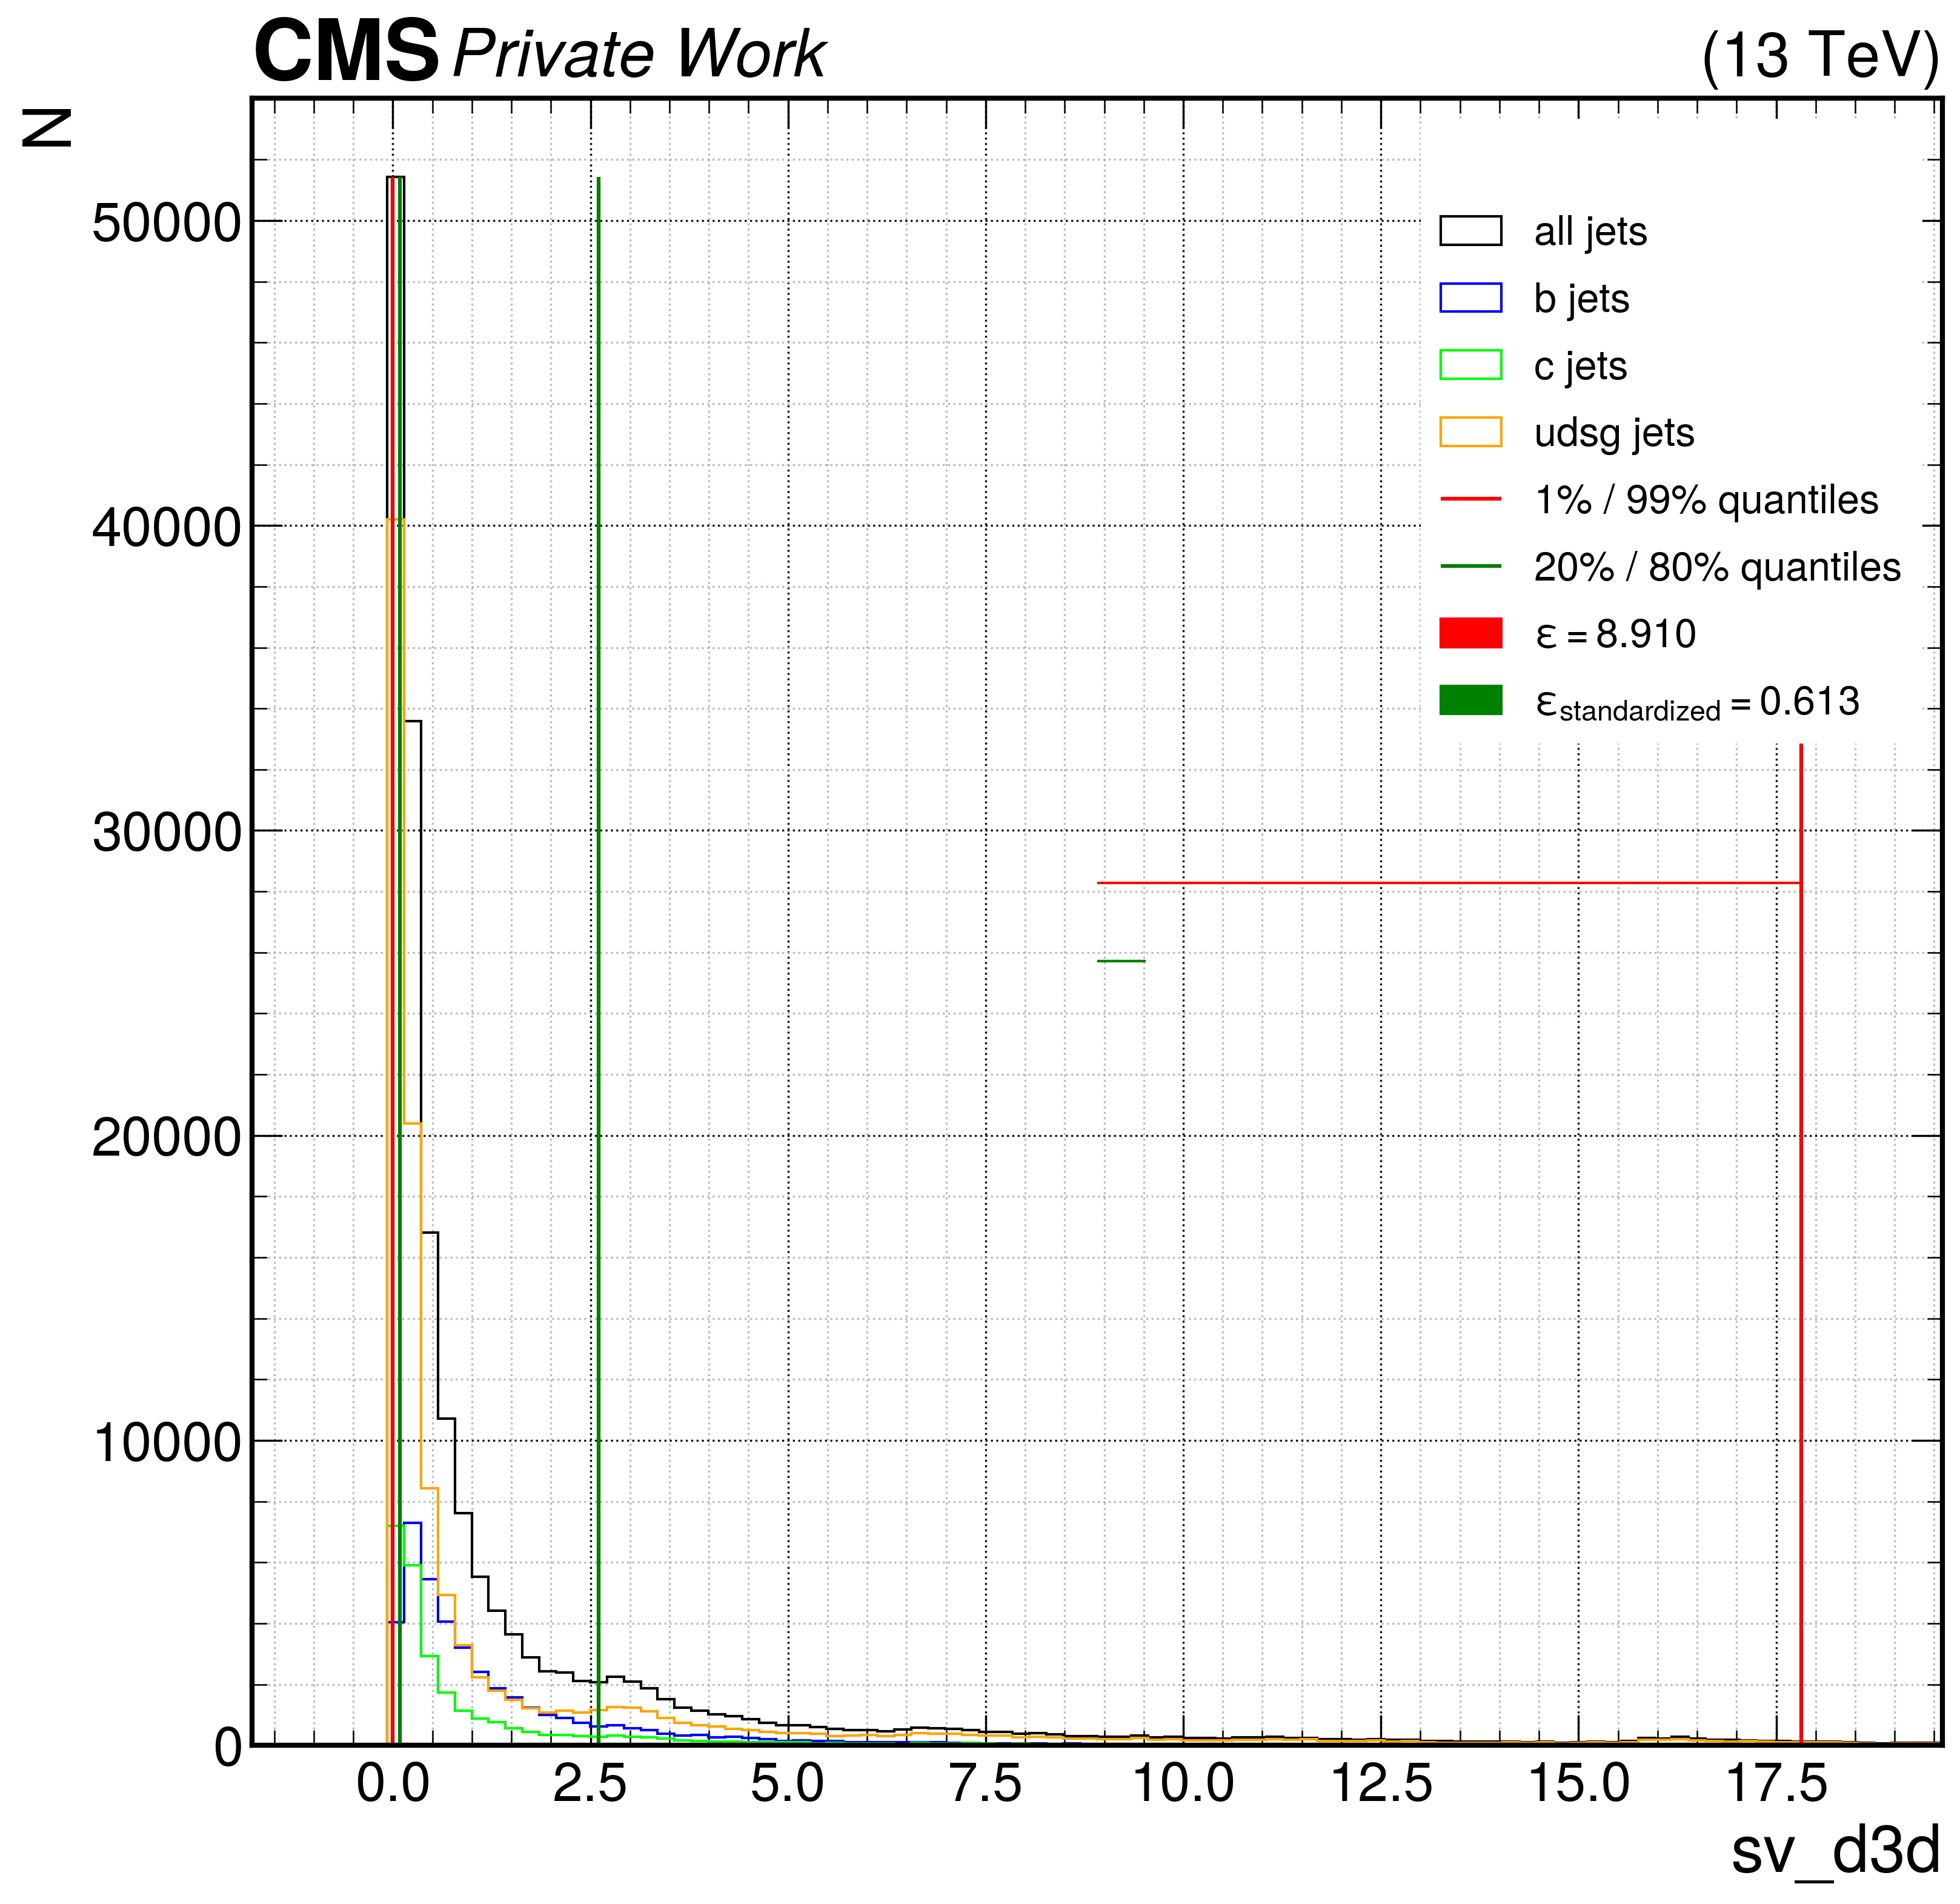

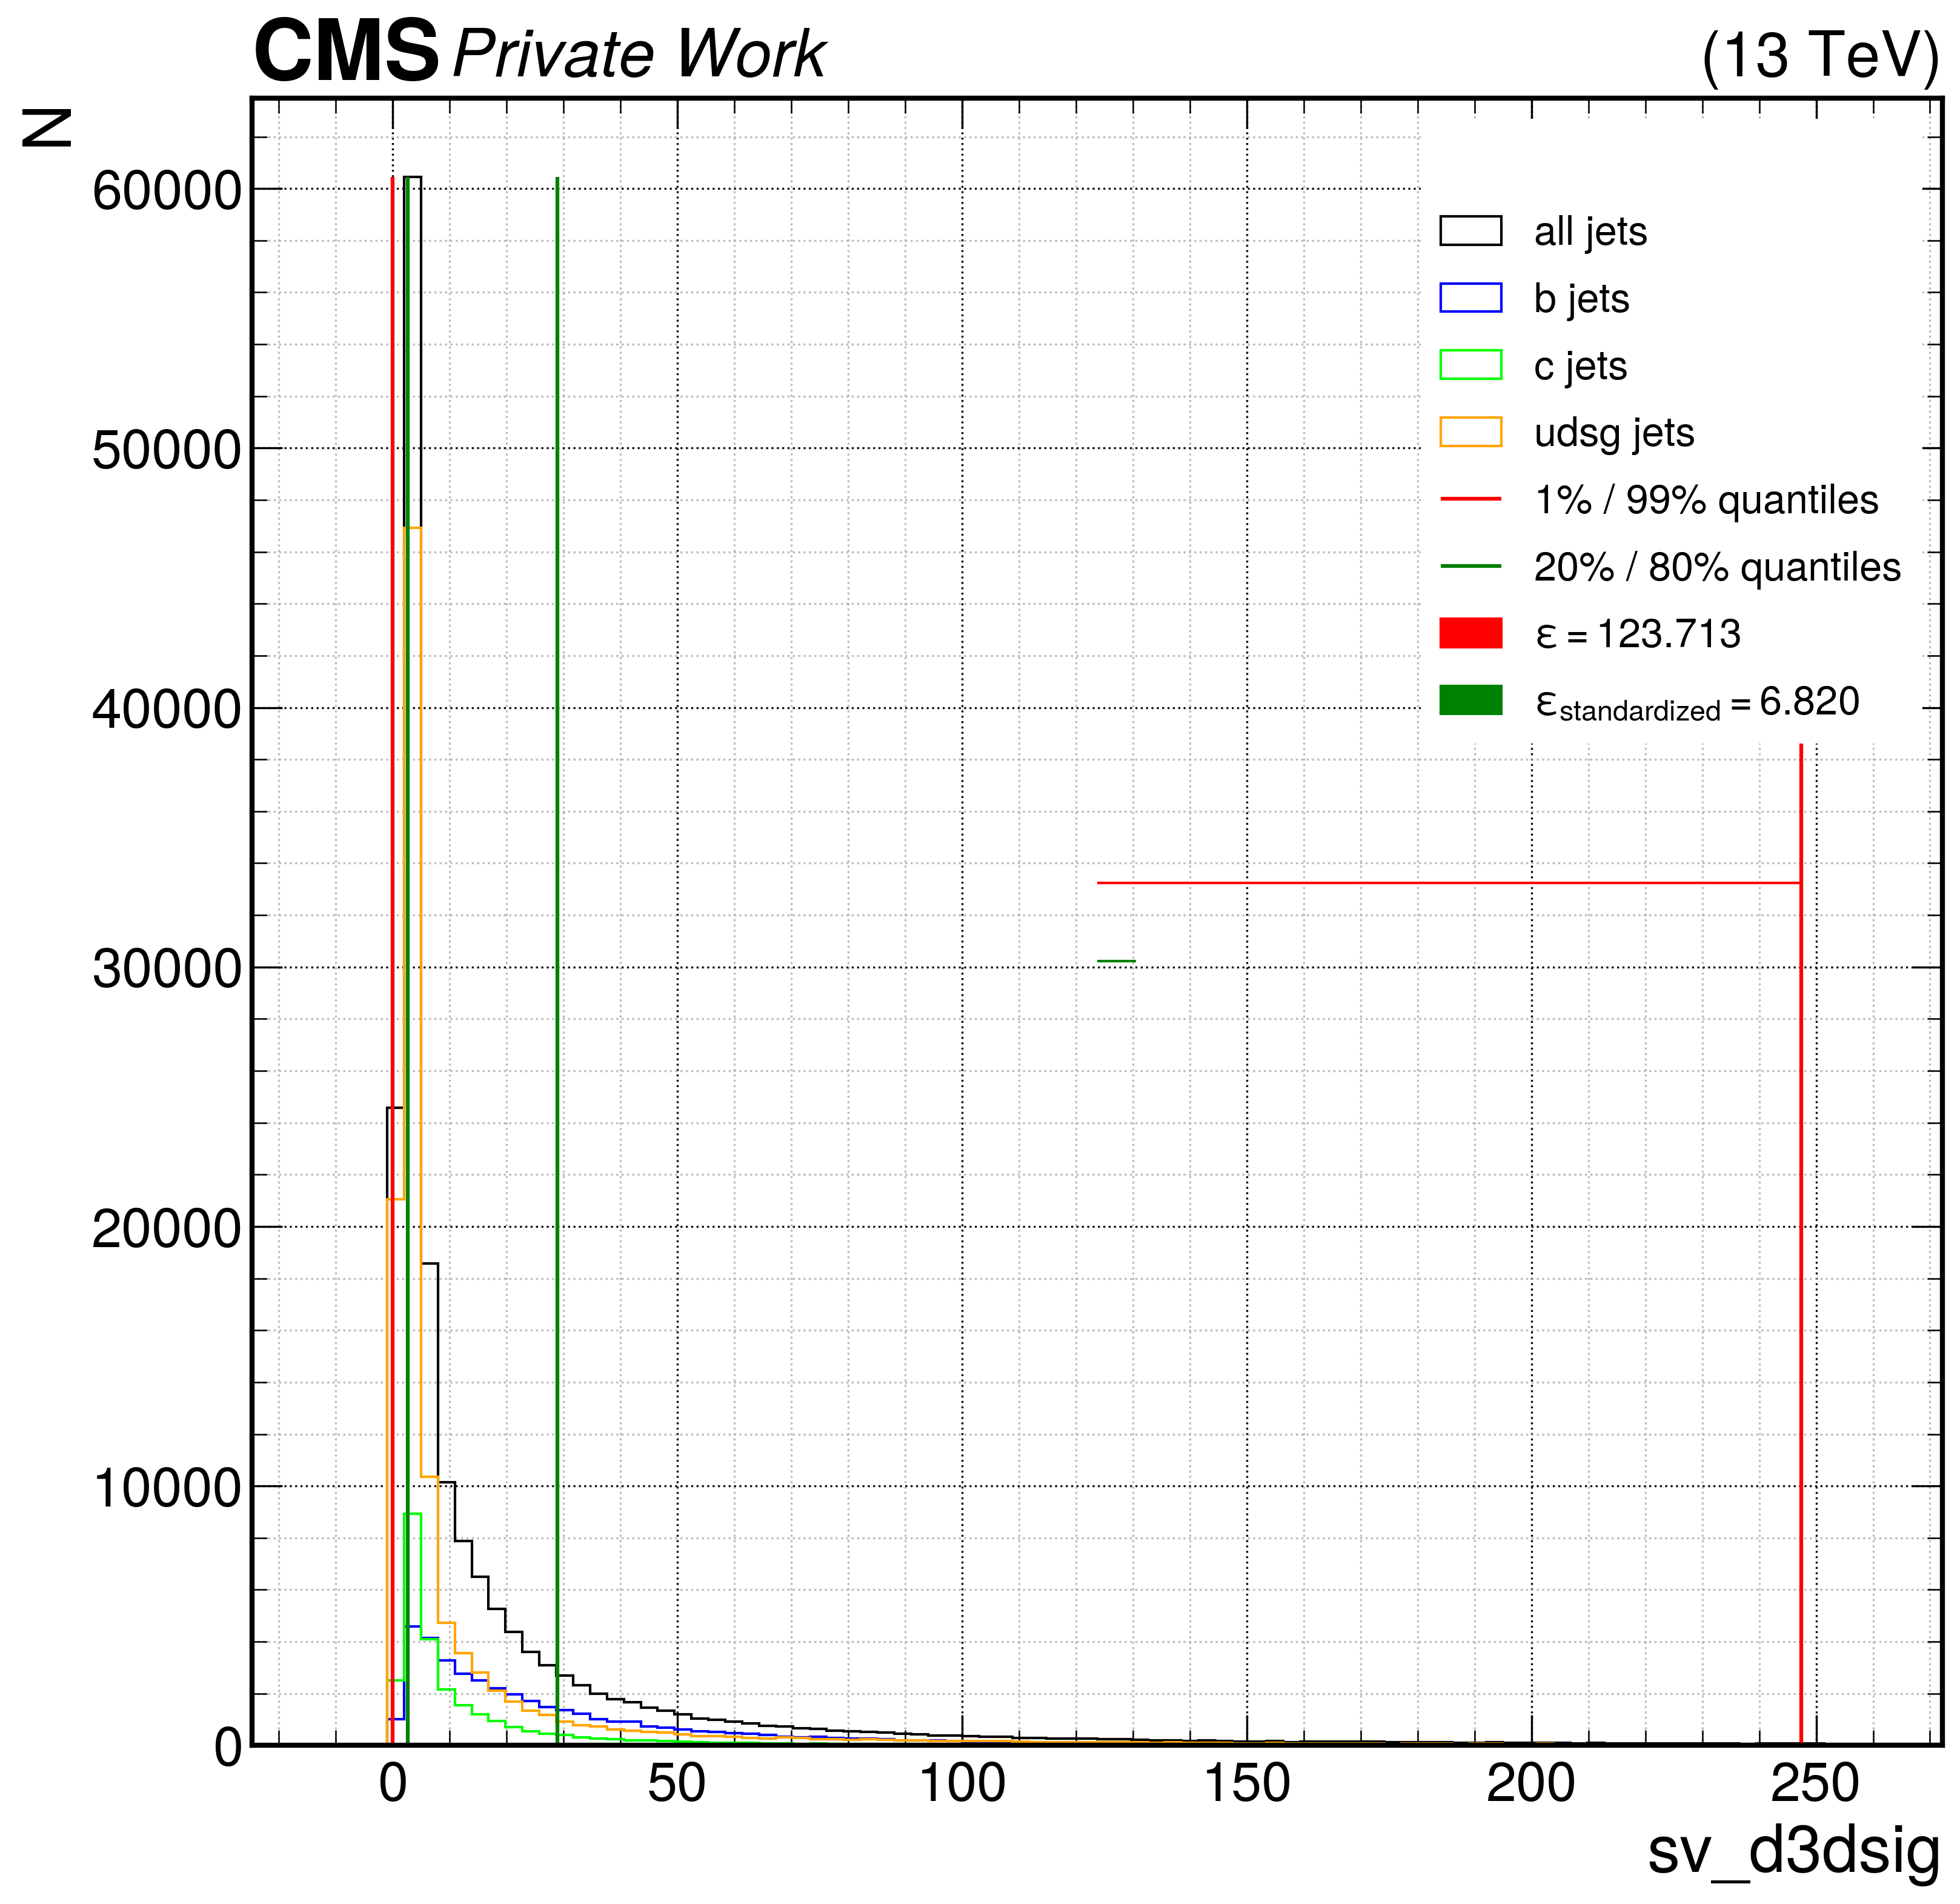

In [47]:
### Comparison of old and new epsilons

# get true flavours
isB = ak.to_numpy(df_y['isB'][:])
isGBB = ak.to_numpy(df_y['isGBB'][:])
isBB = ak.to_numpy(df_y['isBB'][:])
isLeptonicB = ak.to_numpy(df_y['isLeptonicB'][:])
isLeptonicB_C = ak.to_numpy(df_y['isLeptonicB_C'][:])
isC = ak.to_numpy(df_y['isC'][:])
isGCC = ak.to_numpy(df_y['isGCC'][:])
isCC = ak.to_numpy(df_y['isCC'][:])
isUD = ak.to_numpy(df_y['isUD'][:])
isS = ak.to_numpy(df_y['isS'][:])
isG = ak.to_numpy(df_y['isG'][:])
isPU = ak.to_numpy(df_y['isPU'][:])
isUndefined = ak.to_numpy(df_y['isUndefined'][:])

B = isB + + isGBB + isBB + isLeptonicB + isLeptonicB_C
C = isC + isGCC + isCC
UDSG = isUD + isS + isG
isDefined = (B+C+UDSG) == 1

keys = ['jet_pt','jet_eta','Cpfcan_BtagPf_trackDeltaR',
        'Cpfcan_BtagPf_trackPParRatio','Cpfcan_BtagPf_trackSip2dVal','Cpfcan_BtagPf_trackSip2dSig','Cpfcan_BtagPf_trackSip3dVal','Cpfcan_BtagPf_trackSip3dSig',
        'Npfcan_ptrel','Npfcan_deltaR',
        'sv_deltaR','sv_mass','sv_dxy','sv_dxysig','sv_d3d','sv_d3dsig']
saveDir = '/net/scratch_cms3a/hschoenen/deepjet/plots/epsilons'
for key in keys:
    # get array of variable
    if key in global_branches:
        i = np.where(np.array(global_branches)==key)[0]
        array_np = ak.to_numpy(df_glob[key][:])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
    elif key in cpf_branches:
        i = np.where(np.array(cpf_branches)==key)[0]
        array_np = ak.to_numpy(df_cpf_clip[key][:,0])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
    elif key in npf_branches:
        i = np.where(np.array(npf_branches)==key)[0]
        array_np = ak.to_numpy(df_npf_clip[key][:,0])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
    elif key in vtx_branches:
        i = np.where(np.array(vtx_branches)==key)[0]
        array_np = ak.to_numpy(df_vtx_clip[key][:,0])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
    else:
        print('key error: ',key)

    # exclude default values
    non_default = abs(array_np)>10**(-20)
    # compute epsilons 
    mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
    mini_, maxi_ = np.quantile(array_np[non_default & isDefined],0.2),np.quantile(array_np[non_default & isDefined],0.8)
    epsilon = (maxi - mini) / 2
    standardized_epsilon = np.std(array_np[(array_np > mini_) & (array_np < maxi_) & non_default & isDefined])
    mean = np.mean(array_np[(array_np > mini_) & (array_np < maxi_) & non_default & isDefined])
    middle = (maxi+mini)/2

    # print some information about the epsilons
    print(key)
    print('mini = {:.3f} , maxi = {:.3f} , mini_ = {:.3f} , maxi_ = {:.3f}'.format(mini,maxi,mini_,maxi_))
    print('epsilon = {:.3f} , standardized epsilons = {:.3f}'.format(epsilon,standardized_epsilon))

    binning = [mini-0.1*abs(maxi-mini), maxi+0.1*abs(maxi-mini), 100]
    plt.style.use(hep.cms.style.ROOT)
    plt.rcParams['axes.axisbelow'] = True
    # make figure
    fig,ax = plt.subplots(figsize=[12,12], dpi=300)
    ax.set_xlim(left=binning[0], right=binning[1])
    ax.set_ylabel('N')
    ax.set_xlabel(key)
    ax.grid(which='minor', alpha=0.85)
    ax.grid(which='major', alpha=0.95, color='black')
    # plot histogram
    entries, bins, patches = ax.hist(array_np[non_default & isDefined], bins=binning[2], range=(binning[0],binning[1]), label='all jets', color='black', histtype='step')
    ymax = np.max(entries)
    ax.hist(array_np[non_default & B==1], bins=binning[2], range=(binning[0],binning[1]), label='b jets', color='blue', histtype='step')
    ax.hist(array_np[non_default & C==1], bins=binning[2], range=(binning[0],binning[1]), label='c jets', color='lime', histtype='step')
    ax.hist(array_np[non_default & UDSG==1], bins=binning[2], range=(binning[0],binning[1]), label='udsg jets', color='orange', histtype='step')
    # plot quantiles
    ax.vlines([mini,maxi], 0, ymax, colors='red', label='1% / 99% quantiles')
    ax.vlines([mini_,maxi_], 0, ymax, colors='green', label='20% / 80% quantiles')
    # plot epsilons
    ax.arrow(x=middle, y=0.55*ymax, dx=epsilon, dy=0, color='red', label='$\epsilon=$'+'{:.3f}'.format(epsilon), length_includes_head=True)
    ax.arrow(x=middle, y=0.5*ymax, dx=standardized_epsilon, dy=0, color='green', label='$\epsilon_{standardized}=$'+'{:.3f}'.format(standardized_epsilon), length_includes_head=True)
    legloc = 'upper right'
    leg=ax.legend(title=' ', fontsize=16, title_fontsize=20, labelspacing=0.7, loc=legloc, frameon=True, framealpha=1, facecolor='white')
    if 'right' in legloc:
        aligned = 'right'
    else:
        aligned = 'left'
    leg._legend_box.align = aligned
    leg.get_frame().set_linewidth(0.0)
    hep.cms.label(llabel='Private Work', rlabel='(13 TeV)')
    fig.savefig('{}/epsilons-{}.pdf'.format(saveDir,key))